#**Orignal Data**

##**EDA and Data Augmentation**

In [ ]:
import json
import urllib.request
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/FCDSummaryValues.csv", index_col = 0)

In [ ]:
df.head()

,id,url_name,Peak_Heat_Release_Rate,Peak_Heat_Release_Rate - Uncertainty,time_to_peak_heat_release_rate,time_to_peak_heat_release_rate - Uncertainty,total_heat_released,total_heat_released - Uncertainty,total_fuel_mass_burned,total_fuel_mass_burned - Uncertainty,...,co_yield,co_yield - Uncertainty,soot_yield,soot_yield - Uncertainty,test_duration,test_duration - Uncertainty,fuel_type,fuel_type - Uncertainty,net_fuel_mass,net_fuel_mass - Uncertainty
0,1647008482,http://nfrl1.el.nist.gov/HRR/JSON_FILES/EXPERI...,96.46,6.237851,21.45,0.166667,173.80297,12.235370,10.284199,0.786984,...,0.112912,0.009549,0.009760,0.003991,55.816667,0.033333,"PVC, Natural Gas",[],NaN,NaN
1,1646936290,http://nfrl1.el.nist.gov/HRR/JSON_FILES/EXPERI...,127.17,7.774227,11.38,0.166667,126.85369,9.133598,7.506136,0.585486,...,0.087455,0.007513,0.018994,0.004511,39.666667,0.033333,"PVC, Natural Gas",[],NaN,NaN
2,1646410394,http://nfrl1.el.nist.gov/HRR/JSON_FILES/EXPERI...,44.72,3.272653,15.55,0.166667,36.46506,3.146284,2.157696,0.197103,...,0.026711,0.002623,0.011638,0.001902,26.150000,0.033333,"PVC, Natural Gas",[],NaN,NaN
3,1646317604,http://nfrl1.el.nist.gov/HRR/JSON_FILES/EXPERI...,279.98,15.619808,9.73,0.166667,199.53617,12.053160,4.988404,0.336445,...,0.094687,0.007239,0.039490,0.008568,33.750000,0.033333,"Plastics, Natural Gas",[],NaN,NaN
4,1646236342,http://nfrl1.el.nist.gov/HRR/JSON_FILES/EXPERI...,476.98,25.109751,18.90,0.166667,260.05008,15.068432,6.501252,0.424206,...,0.020452,0.001524,0.052682,0.008195,34.866667,0.033333,"Plastics, Natural Gas",[],NaN,NaN


In [ ]:
df.shape

(1021, 30)

Dropping ID and URL as they are not useful

In [ ]:
df.drop(['id', 'url_name'], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['Peak_Heat_Release_Rate', 'Peak_Heat_Release_Rate - Uncertainty',
       'time_to_peak_heat_release_rate',
       'time_to_peak_heat_release_rate - Uncertainty', 'total_heat_released',
       'total_heat_released - Uncertainty', 'total_fuel_mass_burned',
       'total_fuel_mass_burned - Uncertainty',
       'net_effective_heat_of_combustion',
       'net_effective_heat_of_combustion - Uncertainty',
       'net_heat_of_combustion_per_mass_fuel',
       'net_heat_of_combustion_per_mass_fuel - Uncertainty',
       'net_heat_of_combustion_per_mass_o2',
       'net_heat_of_combustion_per_mass_o2 - Uncertainty', 'o2_yield',
       'o2_yield - Uncertainty', 'co2_yield', 'co2_yield - Uncertainty',
       'co_yield', 'co_yield - Uncertainty', 'soot_yield',
       'soot_yield - Uncertainty', 'test_duration',
       'test_duration - Uncertainty', 'fuel_type', 'fuel_type - Uncertainty',
       'net_fuel_mass', 'net_fuel_mass - Uncertainty'],
      dtype='object')

In [ ]:
df.isnull().sum()

Peak_Heat_Release_Rate                                  0
Peak_Heat_Release_Rate - Uncertainty                    0
time_to_peak_heat_release_rate                          0
time_to_peak_heat_release_rate - Uncertainty            0
total_heat_released                                     0
total_heat_released - Uncertainty                       0
total_fuel_mass_burned                                  0
total_fuel_mass_burned - Uncertainty                    0
net_effective_heat_of_combustion                      815
net_effective_heat_of_combustion - Uncertainty        815
net_heat_of_combustion_per_mass_fuel                    0
net_heat_of_combustion_per_mass_fuel - Uncertainty      0
net_heat_of_combustion_per_mass_o2                      0
net_heat_of_combustion_per_mass_o2 - Uncertainty        0
o2_yield                                                0
o2_yield - Uncertainty                                  0
co2_yield                                               0
co2_yield - Un

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1020
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Peak_Heat_Release_Rate                              1021 non-null   float64
 1   Peak_Heat_Release_Rate - Uncertainty                1021 non-null   float64
 2   time_to_peak_heat_release_rate                      1021 non-null   float64
 3   time_to_peak_heat_release_rate - Uncertainty        1021 non-null   float64
 4   total_heat_released                                 1021 non-null   float64
 5   total_heat_released - Uncertainty                   1021 non-null   float64
 6   total_fuel_mass_burned                              1021 non-null   float64
 7   total_fuel_mass_burned - Uncertainty                1021 non-null   float64
 8   net_effective_heat_of_combustion                    206 non-null    float64
 9

Dropping **net_effective_heat_of_combustion** and **net_effective_heat_of_combustion - Uncertainty** as it has more than 50% null values

In [ ]:
df.drop(["net_effective_heat_of_combustion", "net_effective_heat_of_combustion - Uncertainty"] , axis = 1, inplace = True)

In [ ]:
df.drop(["net_fuel_mass", "net_fuel_mass - Uncertainty"] , axis = 1, inplace = True)

Iteratively imputing  '***soot_yield***' and '***test_duration***'

In [ ]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
# Replacing NULL values in 'soot_yield' by np.nan
df.loc[df['soot_yield'].isnull(), 'soot_yield'] = np.nan

# Replacing NULL values in 'test_duration' by np.nan
df.loc[df['test_duration'].isnull(), 'test_duration'] = np.nan

In [ ]:
imp.fit(df[['soot_yield']])
trans_soot = imp.transform(df[['soot_yield']])
df.drop('soot_yield', axis = 1, inplace = True)
df['soot_yield'] = trans_soot

In [ ]:
imp.fit(df[['soot_yield - Uncertainty']])
trans_soot_uc = imp.transform(df[['soot_yield - Uncertainty']])
df.drop('soot_yield - Uncertainty', axis = 1, inplace = True)
df['soot_yield - Uncertainty'] = trans_soot_uc

In [ ]:
imp.fit(df[['test_duration']])
trans_test_dur = imp.transform(df[['test_duration']])
df.drop('test_duration', axis = 1, inplace = True)
df['test_duration'] = trans_test_dur

In [ ]:
imp.fit(df[['test_duration - Uncertainty']])
trans_test_dur_uc = imp.transform(df[['test_duration - Uncertainty']])
df.drop('test_duration - Uncertainty', axis = 1, inplace = True)
df['test_duration - Uncertainty'] = trans_test_dur_uc

In [ ]:
df.isnull().sum()

Peak_Heat_Release_Rate                                0
Peak_Heat_Release_Rate - Uncertainty                  0
time_to_peak_heat_release_rate                        0
time_to_peak_heat_release_rate - Uncertainty          0
total_heat_released                                   0
total_heat_released - Uncertainty                     0
total_fuel_mass_burned                                0
total_fuel_mass_burned - Uncertainty                  0
net_heat_of_combustion_per_mass_fuel                  0
net_heat_of_combustion_per_mass_fuel - Uncertainty    0
net_heat_of_combustion_per_mass_o2                    0
net_heat_of_combustion_per_mass_o2 - Uncertainty      0
o2_yield                                              0
o2_yield - Uncertainty                                0
co2_yield                                             0
co2_yield - Uncertainty                               0
co_yield                                              0
co_yield - Uncertainty                          



```
#We are getting a white stripe as the *test duration uncertainty* has same value for all experiments.
```



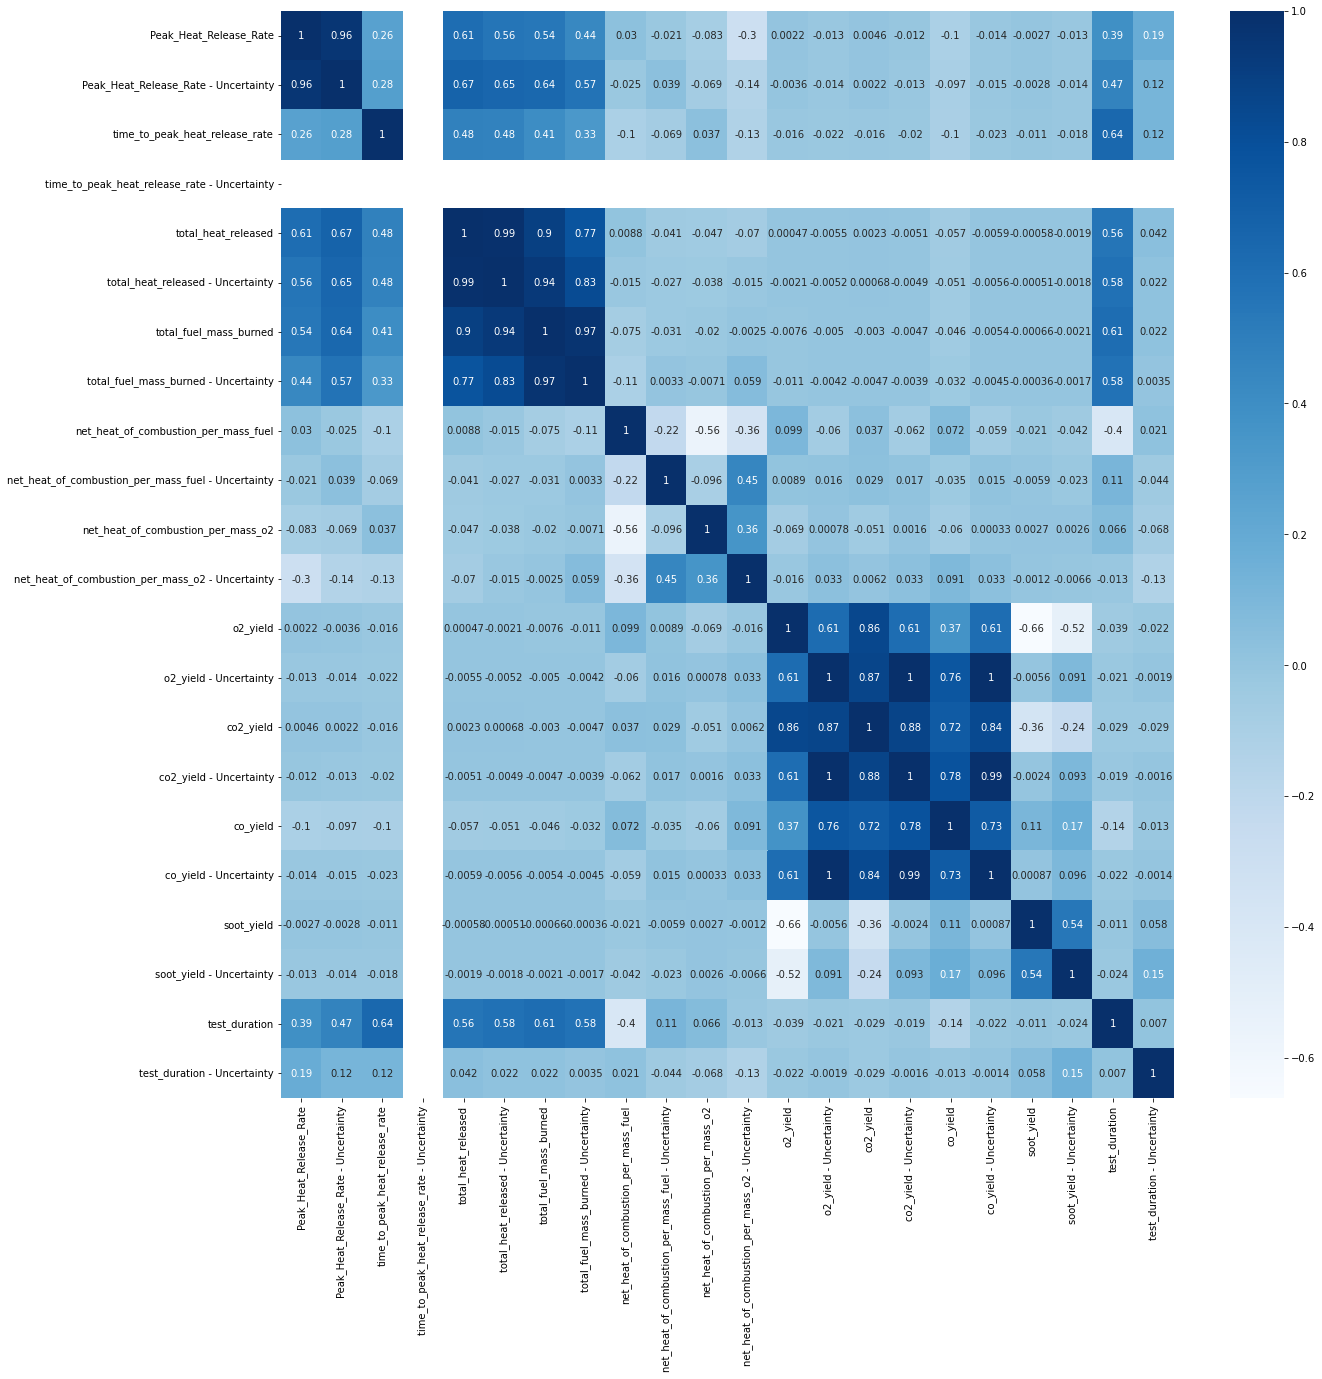

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
cm = df.corr()

In [ ]:
cm

,Peak_Heat_Release_Rate,Peak_Heat_Release_Rate - Uncertainty,time_to_peak_heat_release_rate,time_to_peak_heat_release_rate - Uncertainty,total_heat_released,total_heat_released - Uncertainty,total_fuel_mass_burned,total_fuel_mass_burned - Uncertainty,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_fuel - Uncertainty,...,o2_yield,o2_yield - Uncertainty,co2_yield,co2_yield - Uncertainty,co_yield,co_yield - Uncertainty,soot_yield,soot_yield - Uncertainty,test_duration,test_duration - Uncertainty
Peak_Heat_Release_Rate,1.000000,0.957374,0.264361,NaN,0.606658,0.556821,0.539516,0.441589,0.029659,-0.021125,...,0.002233,-0.013063,0.004638,-0.012112,-0.104630,-0.013930,-0.002718,-0.012584,0.385803,0.187698
Peak_Heat_Release_Rate - Uncertainty,0.957374,1.000000,0.280487,NaN,0.671083,0.650122,0.642746,0.567706,-0.025126,0.038984,...,-0.003602,-0.014045,0.002165,-0.013021,-0.096655,-0.014966,-0.002780,-0.014427,0.469309,0.121331
time_to_peak_heat_release_rate,0.264361,0.280487,1.000000,NaN,0.483128,0.475439,0.409101,0.329466,-0.104370,-0.068755,...,-0.016302,-0.021696,-0.016375,-0.020110,-0.099715,-0.022979,-0.011441,-0.017594,0.640677,0.120661
time_to_peak_heat_release_rate - Uncertainty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_heat_released,0.606658,0.671083,0.483128,NaN,1.000000,0.990813,0.900871,0.767795,0.008812,-0.040780,...,0.000471,-0.005541,0.002250,-0.005135,-0.057261,-0.005915,-0.000585,-0.001918,0.557552,0.042222
total_heat_released - Uncertainty,0.556821,0.650122,0.475439,NaN,0.990813,1.000000,0.936784,0.829537,-0.014858,-0.026990,...,-0.002107,-0.005243,0.000682,-0.004858,-0.050558,-0.005590,-0.000512,-0.001810,0.578454,0.021817
total_fuel_mass_burned,0.539516,0.642746,0.409101,NaN,0.900871,0.936784,1.000000,0.967857,-0.074809,-0.031195,...,-0.007575,-0.005038,-0.003025,-0.004667,-0.045714,-0.005373,-0.000660,-0.002140,0.607748,0.022341
total_fuel_mass_burned - Uncertainty,0.441589,0.567706,0.329466,NaN,0.767795,0.829537,0.967857,1.000000,-0.107260,0.003339,...,-0.010652,-0.004194,-0.004720,-0.003883,-0.032439,-0.004468,-0.000362,-0.001682,0.575556,0.003454
net_heat_of_combustion_per_mass_fuel,0.029659,-0.025126,-0.104370,NaN,0.008812,-0.014858,-0.074809,-0.107260,1.000000,-0.224199,...,0.098613,-0.060499,0.037140,-0.062170,0.071672,-0.059219,-0.020689,-0.042083,-0.398283,0.021282
net_heat_of_combustion_per_mass_fuel - Uncertainty,-0.021125,0.038984,-0.068755,NaN,-0.040780,-0.026990,-0.031195,0.003339,-0.224199,1.000000,...,0.008891,0.016458,0.028925,0.017357,-0.034858,0.014860,-0.005864,-0.023436,0.111737,-0.044262


In [ ]:
dfc = df.drop(['fuel_type', 'fuel_type - Uncertainty'], axis = 1)

In [ ]:
dfc.columns

Index(['Peak_Heat_Release_Rate', 'Peak_Heat_Release_Rate - Uncertainty',
       'time_to_peak_heat_release_rate',
       'time_to_peak_heat_release_rate - Uncertainty', 'total_heat_released',
       'total_heat_released - Uncertainty', 'total_fuel_mass_burned',
       'total_fuel_mass_burned - Uncertainty',
       'net_heat_of_combustion_per_mass_fuel',
       'net_heat_of_combustion_per_mass_fuel - Uncertainty',
       'net_heat_of_combustion_per_mass_o2',
       'net_heat_of_combustion_per_mass_o2 - Uncertainty', 'o2_yield',
       'o2_yield - Uncertainty', 'co2_yield', 'co2_yield - Uncertainty',
       'co_yield', 'co_yield - Uncertainty', 'soot_yield',
       'soot_yield - Uncertainty', 'test_duration',
       'test_duration - Uncertainty'],
      dtype='object')

In [ ]:
dfc.shape

(1021, 22)

##**Data Augmentation**

In [ ]:
value_features = ['Peak_Heat_Release_Rate', 'time_to_peak_heat_release_rate', 
       'total_heat_released','total_fuel_mass_burned','net_heat_of_combustion_per_mass_fuel', 'net_heat_of_combustion_per_mass_o2', 'o2_yield',
       'co2_yield', 'co_yield', 'soot_yield','test_duration' ]
  

uc_features = [ 'Peak_Heat_Release_Rate - Uncertainty', 'time_to_peak_heat_release_rate - Uncertainty', 
       'total_heat_released - Uncertainty','total_fuel_mass_burned - Uncertainty','net_heat_of_combustion_per_mass_fuel - Uncertainty',
        'net_heat_of_combustion_per_mass_o2 - Uncertainty',
        'o2_yield - Uncertainty',
       'co2_yield - Uncertainty', 'co_yield - Uncertainty', 'soot_yield - Uncertainty','test_duration - Uncertainty']

In [ ]:
df_augmented = pd.DataFrame(columns = value_features)
for r in range(1021):
  l1 = list(dfc.iloc[r][value_features])
  l2 = [np.sqrt(i**2)/2 for i in list(dfc.iloc[r][uc_features])]
  res =  []
  res.append(np.random.normal(l1[0],l2[0],100))
  res.append(np.random.normal(l1[1],l2[1],100))
  res.append(np.random.normal(l1[2],l2[2],100))
  res.append(np.random.normal(l1[3],l2[3],100))
  res.append(np.random.normal(l1[4],l2[4],100))
  res.append(np.random.normal(l1[5],l2[5],100))
  res.append(np.random.normal(l1[6],l2[6],100))
  res.append(np.random.normal(l1[7],l2[7],100))
  res.append(np.random.normal(l1[8],l2[8],100))
  res.append(np.random.normal(l1[9],l2[9],100))
  res.append(np.random.normal(l1[10],l2[10],100))
  res1 = pd.DataFrame(np.array(res).T, columns = value_features)
  df_augmented = pd.concat([df_augmented, res1], ignore_index = True)

In [ ]:
df_augmented.head()

,Peak_Heat_Release_Rate,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration
0,92.543481,21.532154,175.944511,10.400908,17.071383,12.199580,1.208778,0.977067,0.112209,0.008381,55.797448
1,95.799794,21.495632,174.691774,10.194745,16.783915,12.807377,1.228467,1.044620,0.117715,0.007989,55.819278
2,91.879227,21.388299,165.692322,10.861296,16.945186,12.780879,1.188400,0.941367,0.110818,0.010355,55.829343
3,94.377527,21.435636,179.775558,10.751781,17.141086,12.657267,1.181031,1.003481,0.110771,0.010733,55.817785
4,100.606405,21.644232,175.096457,10.193867,17.110521,12.808679,1.218106,1.005806,0.113690,0.009143,55.835005


In [ ]:
df_augmented.shape

(102100, 11)

In [ ]:
df_augmented.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102100 entries, 0 to 102099
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Peak_Heat_Release_Rate                102100 non-null  float64
 1   time_to_peak_heat_release_rate        102100 non-null  float64
 2   total_heat_released                   102100 non-null  float64
 3   total_fuel_mass_burned                102100 non-null  float64
 4   net_heat_of_combustion_per_mass_fuel  102100 non-null  float64
 5   net_heat_of_combustion_per_mass_o2    102100 non-null  float64
 6   o2_yield                              102100 non-null  float64
 7   co2_yield                             102100 non-null  float64
 8   co_yield                              102100 non-null  float64
 9   soot_yield                            102100 non-null  float64
 10  test_duration                         102100 non-null  float64
dtype

In [ ]:
dfc_val_features = dfc[value_features]

In [ ]:
dfc_val_features.shape

(1021, 11)

In [ ]:
dfc_val_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1021 entries, 0 to 1020
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Peak_Heat_Release_Rate                1021 non-null   float64
 1   time_to_peak_heat_release_rate        1021 non-null   float64
 2   total_heat_released                   1021 non-null   float64
 3   total_fuel_mass_burned                1021 non-null   float64
 4   net_heat_of_combustion_per_mass_fuel  1021 non-null   float64
 5   net_heat_of_combustion_per_mass_o2    1021 non-null   float64
 6   o2_yield                              1021 non-null   float64
 7   co2_yield                             1021 non-null   float64
 8   co_yield                              1021 non-null   float64
 9   soot_yield                            1021 non-null   float64
 10  test_duration                         1021 non-null   float64
dtypes: float64(11)
me

In [ ]:
cor_rel = dfc_val_features.corr()

In [ ]:
cor_rel

,Peak_Heat_Release_Rate,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration
Peak_Heat_Release_Rate,1.000000,0.264361,0.606658,0.539516,0.029659,-0.083305,0.002233,0.004638,-0.104630,-0.002718,0.385803
time_to_peak_heat_release_rate,0.264361,1.000000,0.483128,0.409101,-0.104370,0.036523,-0.016302,-0.016375,-0.099715,-0.011441,0.640677
total_heat_released,0.606658,0.483128,1.000000,0.900871,0.008812,-0.046757,0.000471,0.002250,-0.057261,-0.000585,0.557552
total_fuel_mass_burned,0.539516,0.409101,0.900871,1.000000,-0.074809,-0.020074,-0.007575,-0.003025,-0.045714,-0.000660,0.607748
net_heat_of_combustion_per_mass_fuel,0.029659,-0.104370,0.008812,-0.074809,1.000000,-0.561697,0.098613,0.037140,0.071672,-0.020689,-0.398283
net_heat_of_combustion_per_mass_o2,-0.083305,0.036523,-0.046757,-0.020074,-0.561697,1.000000,-0.069061,-0.051285,-0.059651,0.002714,0.065793
o2_yield,0.002233,-0.016302,0.000471,-0.007575,0.098613,-0.069061,1.000000,0.855591,0.368502,-0.661533,-0.039140
co2_yield,0.004638,-0.016375,0.002250,-0.003025,0.037140,-0.051285,0.855591,1.000000,0.723999,-0.362376,-0.029148
co_yield,-0.104630,-0.099715,-0.057261,-0.045714,0.071672,-0.059651,0.368502,0.723999,1.000000,0.109270,-0.144522
soot_yield,-0.002718,-0.011441,-0.000585,-0.000660,-0.020689,0.002714,-0.661533,-0.362376,0.109270,1.000000,-0.010841


In [ ]:
df_augmented.corr()

,Peak_Heat_Release_Rate,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration
Peak_Heat_Release_Rate,1.000000,0.265096,0.606784,0.538213,0.029583,-0.082495,-0.000938,0.000577,0.002463,-0.002780,0.385947
time_to_peak_heat_release_rate,0.265096,1.000000,0.482839,0.410476,-0.104142,0.034124,-0.001818,0.000775,0.004726,-0.008451,0.640675
total_heat_released,0.606784,0.482839,1.000000,0.898498,0.008902,-0.048515,-0.000403,0.000246,0.000939,-0.000793,0.557253
total_fuel_mass_burned,0.538213,0.410476,0.898498,1.000000,-0.074129,-0.022577,-0.000463,0.000183,0.000903,-0.000844,0.606704
net_heat_of_combustion_per_mass_fuel,0.029583,-0.104142,0.008902,-0.074129,1.000000,-0.540022,-0.002871,0.002671,0.016429,-0.015417,-0.396053
net_heat_of_combustion_per_mass_o2,-0.082495,0.034124,-0.048515,-0.022577,-0.540022,1.000000,-0.000361,-0.000780,-0.002036,0.001975,0.062053
o2_yield,-0.000938,-0.001818,-0.000403,-0.000463,-0.002871,-0.000361,1.000000,-0.047455,0.064556,-0.012454,-0.002016
co2_yield,0.000577,0.000775,0.000246,0.000183,0.002671,-0.000780,-0.047455,1.000000,-0.046931,0.000280,0.000636
co_yield,0.002463,0.004726,0.000939,0.000903,0.016429,-0.002036,0.064556,-0.046931,1.000000,0.001740,0.004055
soot_yield,-0.002780,-0.008451,-0.000793,-0.000844,-0.015417,0.001975,-0.012454,0.000280,0.001740,1.000000,-0.008408


In [ ]:
dfc_val_features.describe()

,Peak_Heat_Release_Rate,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration
count,1021.000000,1021.000000,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,962.104182,10.152057,990.737018,2.995084e+01,39.208472,13.057228,2.940607,2.526776,0.060396,0.035566,20.485608
std,2439.867667,14.517925,5939.714372,1.974975e+02,12.438269,1.036665,9.196242,6.456616,0.128093,1.141147,24.612943
min,0.010000,0.030000,0.000020,4.319654e-07,15.000000,11.900000,-219.874777,-81.809539,-1.691749,-15.778332,0.383333
25%,72.490000,4.150000,3.518380,7.344828e-02,30.000000,12.540000,1.888454,2.031006,0.016144,0.000584,6.550000
50%,217.130000,5.780000,6.992730,1.496578e-01,46.400000,12.780000,3.543544,2.680585,0.048195,0.004593,9.516667
75%,444.860000,11.000000,140.795900,4.381393e+00,50.000000,13.100000,3.780794,3.005756,0.090053,0.033652,24.100000
max,23534.940000,202.650000,90479.481550,3.929646e+03,50.000000,17.800000,180.629735,180.711317,3.199748,32.198598,247.300000


In [ ]:
df_augmented.describe()

,Peak_Heat_Release_Rate,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration
count,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000,102100.000000
mean,962.077900,10.151656,990.817359,29.964434,39.206890,13.056477,4.794863,1.418497,-0.072753,0.039235,20.485666
std,2439.012569,14.511225,5939.262836,198.042472,12.510215,1.069438,755.406449,808.103594,15.834711,1.685525,24.600891
min,-0.645890,-0.124015,-42.981218,-0.766648,10.820444,11.147364,-45246.397316,-58754.116891,-1554.915886,-54.646720,0.348190
25%,72.377062,4.137546,3.526554,0.074473,27.158984,12.552176,1.895309,1.971666,0.016201,0.000186,6.538295
50%,215.048192,5.815814,7.038692,0.151502,46.164490,12.814509,3.358176,2.662785,0.047360,0.003308,9.526329
75%,447.408394,10.995290,140.984547,4.258783,49.576127,13.170333,3.781385,2.988429,0.090764,0.011269,24.105177
max,24408.241197,202.832459,96348.585122,4444.342427,68.888187,18.947271,76270.203833,60298.198945,1103.242890,85.735231,247.350380


In [ ]:
l = np.repeat(df['fuel_type'], 100).reset_index(drop = True)

In [ ]:
df_augmented['fuel_type'] = l

In [ ]:
df_augmented.head()

,Peak_Heat_Release_Rate,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration,fuel_type
0,92.543481,21.532154,175.944511,10.400908,17.071383,12.199580,1.208778,0.977067,0.112209,0.008381,55.797448,"PVC, Natural Gas"
1,95.799794,21.495632,174.691774,10.194745,16.783915,12.807377,1.228467,1.044620,0.117715,0.007989,55.819278,"PVC, Natural Gas"
2,91.879227,21.388299,165.692322,10.861296,16.945186,12.780879,1.188400,0.941367,0.110818,0.010355,55.829343,"PVC, Natural Gas"
3,94.377527,21.435636,179.775558,10.751781,17.141086,12.657267,1.181031,1.003481,0.110771,0.010733,55.817785,"PVC, Natural Gas"
4,100.606405,21.644232,175.096457,10.193867,17.110521,12.808679,1.218106,1.005806,0.113690,0.009143,55.835005,"PVC, Natural Gas"


In [ ]:
df_augmented.to_csv("/content/df_augforcode.csv")

##**Modeling**

In [ ]:
df_augmented.isnull().sum()

Peak_Heat_Release_Rate                  0
time_to_peak_heat_release_rate          0
total_heat_released                     0
total_fuel_mass_burned                  0
net_heat_of_combustion_per_mass_fuel    0
net_heat_of_combustion_per_mass_o2      0
o2_yield                                0
co2_yield                               0
co_yield                                0
soot_yield                              0
test_duration                           0
fuel_type                               0
dtype: int64

In [ ]:
dfc_val_features.isnull().sum()

Peak_Heat_Release_Rate                  0
time_to_peak_heat_release_rate          0
total_heat_released                     0
total_fuel_mass_burned                  0
net_heat_of_combustion_per_mass_fuel    0
net_heat_of_combustion_per_mass_o2      0
o2_yield                                0
co2_yield                               0
co_yield                                0
soot_yield                              0
test_duration                           0
dtype: int64

In [ ]:
dfc_val_features.shape

(1021, 11)

###**Linear Regression Model**

In [ ]:
import json
import urllib.request
import pandas as pd
import numpy as np
from prettytable import PrettyTable

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold


from sklearn import tree
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.inspection import permutation_importance

from itertools import product, permutations
from collections import OrderedDict
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
table = PrettyTable(["Model Name", "R2 Score_train",  "R2 Score_test", "Root Mean Squared Error(RMSE)_train", "Root Mean Squared Error(RMSE)_test" ,"Mean Absolute Percentage Error(MAPE)_train","Mean Absolute Percentage Error(MAPE)_test"])

###**Helper Functions**

In [ ]:
# Function to get accuracy
def accuracy(X, y, model):
    return round(accuracy(y,model.predict(X)))

In [ ]:
# Function to get confusion matrix
def conmatrix(X, y, model):
    return confusion_matrix(y, model.predict(X))

###**Data Preparation**

In [ ]:
X = dfc_val_features.drop(['Peak_Heat_Release_Rate'], axis = 1)
y = dfc_val_features['Peak_Heat_Release_Rate']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

Text(0.5, 1.0, 'Distribution of Peak Heat Release Rate for Test Dataset')

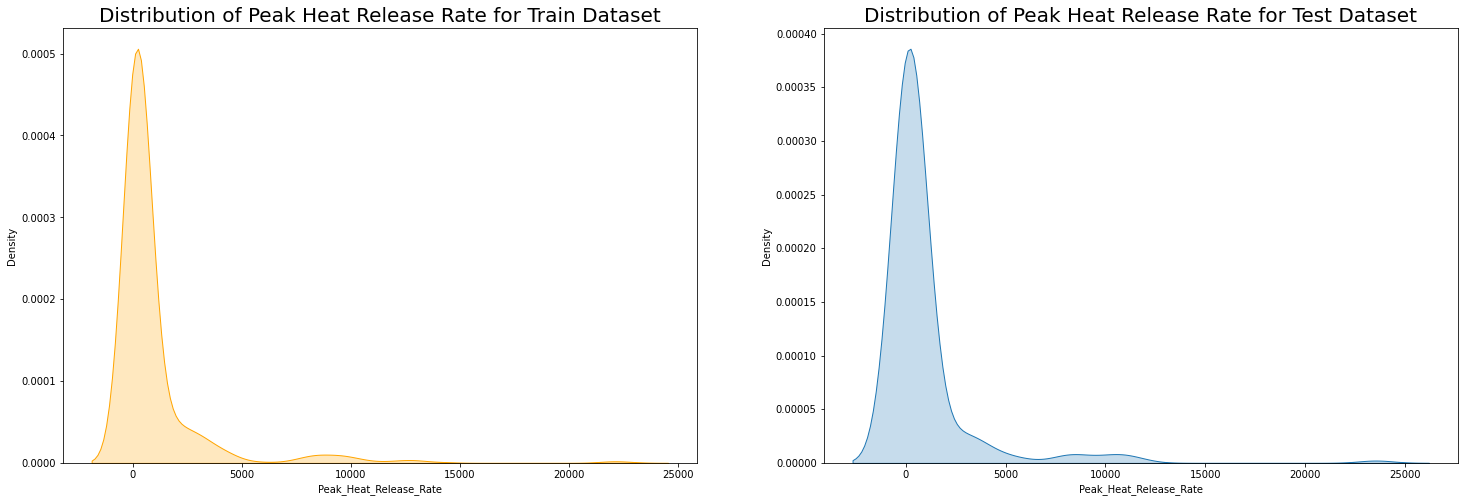

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,8))
sns.kdeplot(y_train, color = 'orange', shade = True, ax = ax[0])
sns.kdeplot(y_test, shade = True, ax = ax[1])
ax[0].set_title("Distribution of Peak Heat Release Rate for Train Dataset", fontdict={'fontsize': 20})
ax[1].set_title("Distribution of Peak Heat Release Rate for Test Dataset", fontdict={'fontsize': 20})

In [ ]:
df_tr = pd.DataFrame(X_train, columns = X.columns).reset_index(drop = True)
df_t = pd.DataFrame(y_train, columns = ['Peak_Heat_Release_Rate']).reset_index(drop = True)
df_con = pd.concat([df_tr, df_t], axis = 1)
df_con.head()

,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration,Peak_Heat_Release_Rate
0,6.42,600.93154,37.278632,16.12,13.10,1.223564,1.563157,0.009478,0.001455,23.000000,895.57
1,2.73,2.77338,0.059771,46.40,12.78,3.597802,2.327275,0.049834,0.004593,4.516667,74.27
2,6.98,1567.07583,31.341517,50.00,12.54,4.142855,3.325280,0.019864,0.035566,7.116667,8629.08
3,10.95,74.23255,1.484651,50.00,12.54,3.889562,2.842692,0.117995,0.017395,11.766667,188.35
4,12.63,33.53487,1.341395,25.00,13.10,1.831945,1.689505,0.052937,0.035566,20.133333,40.72


In [ ]:
df_con.isnull().sum()

time_to_peak_heat_release_rate          0
total_heat_released                     0
total_fuel_mass_burned                  0
net_heat_of_combustion_per_mass_fuel    0
net_heat_of_combustion_per_mass_o2      0
o2_yield                                0
co2_yield                               0
co_yield                                0
soot_yield                              0
test_duration                           0
Peak_Heat_Release_Rate                  0
dtype: int64

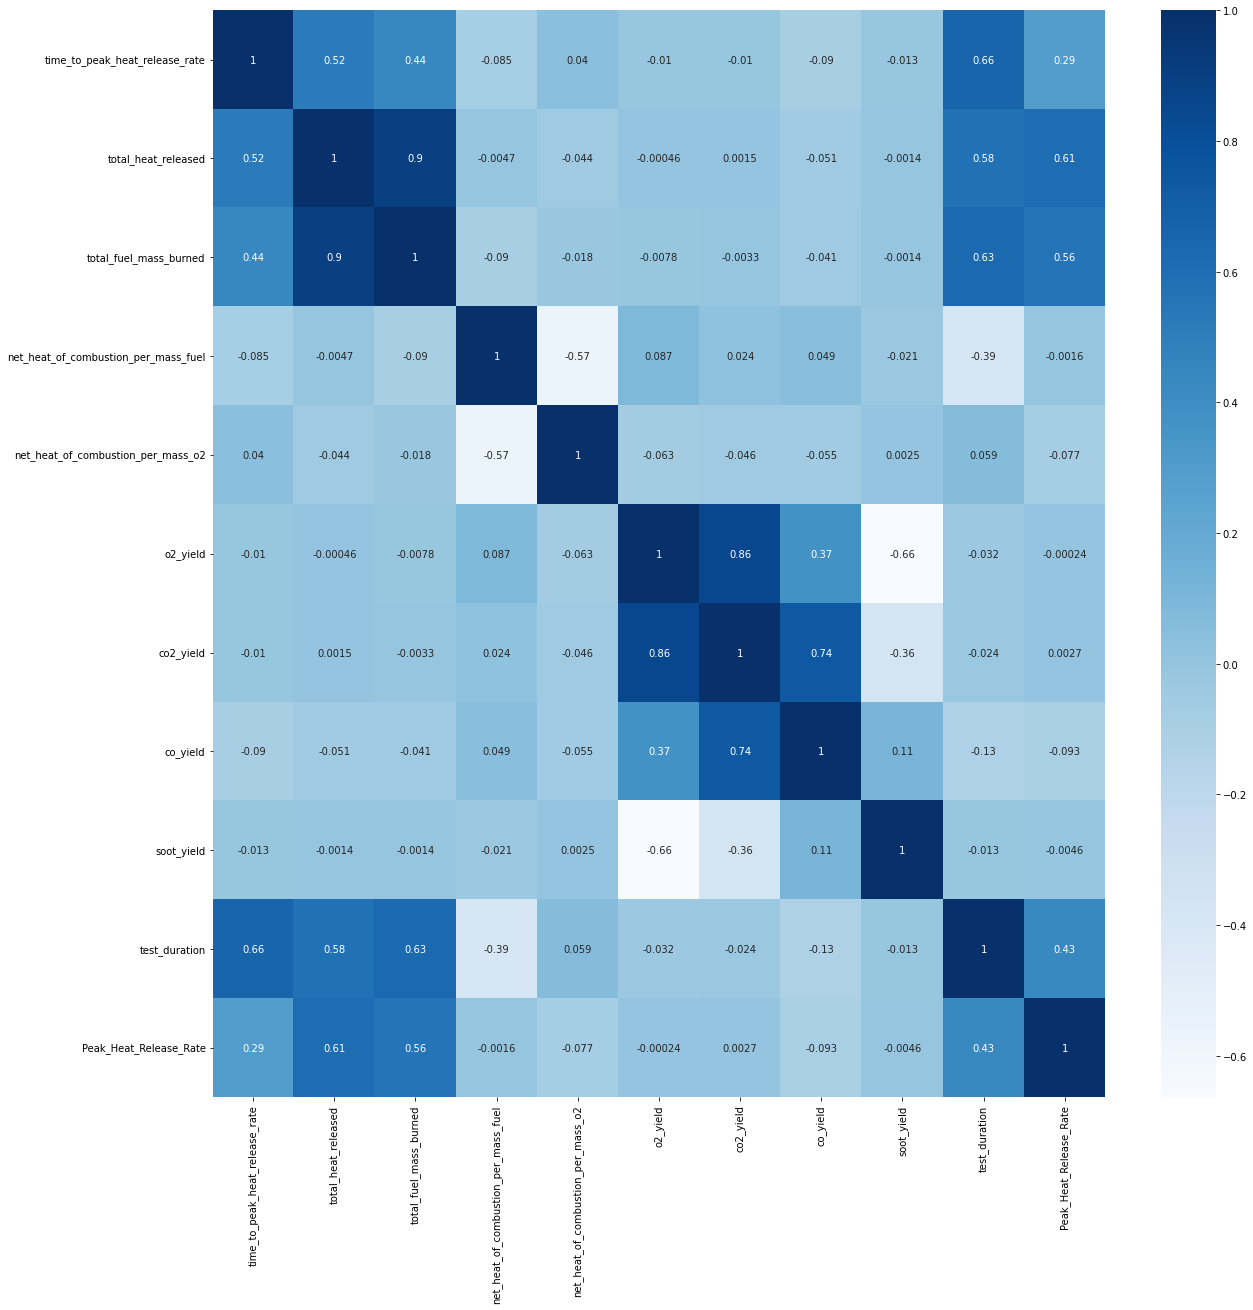

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_con.corr(),cbar=True,annot=True,cmap='Blues')

In [ ]:
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
X_test_std = pd.DataFrame(sc.transform(X_test), columns = X.columns)

In [ ]:
X_train_std.columns

Index(['time_to_peak_heat_release_rate', 'total_heat_released',
       'total_fuel_mass_burned', 'net_heat_of_combustion_per_mass_fuel',
       'net_heat_of_combustion_per_mass_o2', 'o2_yield', 'co2_yield',
       'co_yield', 'soot_yield', 'test_duration'],
      dtype='object')

In [ ]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)
y_pred_train_lr1 = lr.predict(X_train_std)
y_pred_test_lr1 = lr.predict(X_test_std)

In [ ]:
ytr = [i for i in range(len(y_train))]
yt = [i for i in range(len(y_test))]

Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Linear Regression')

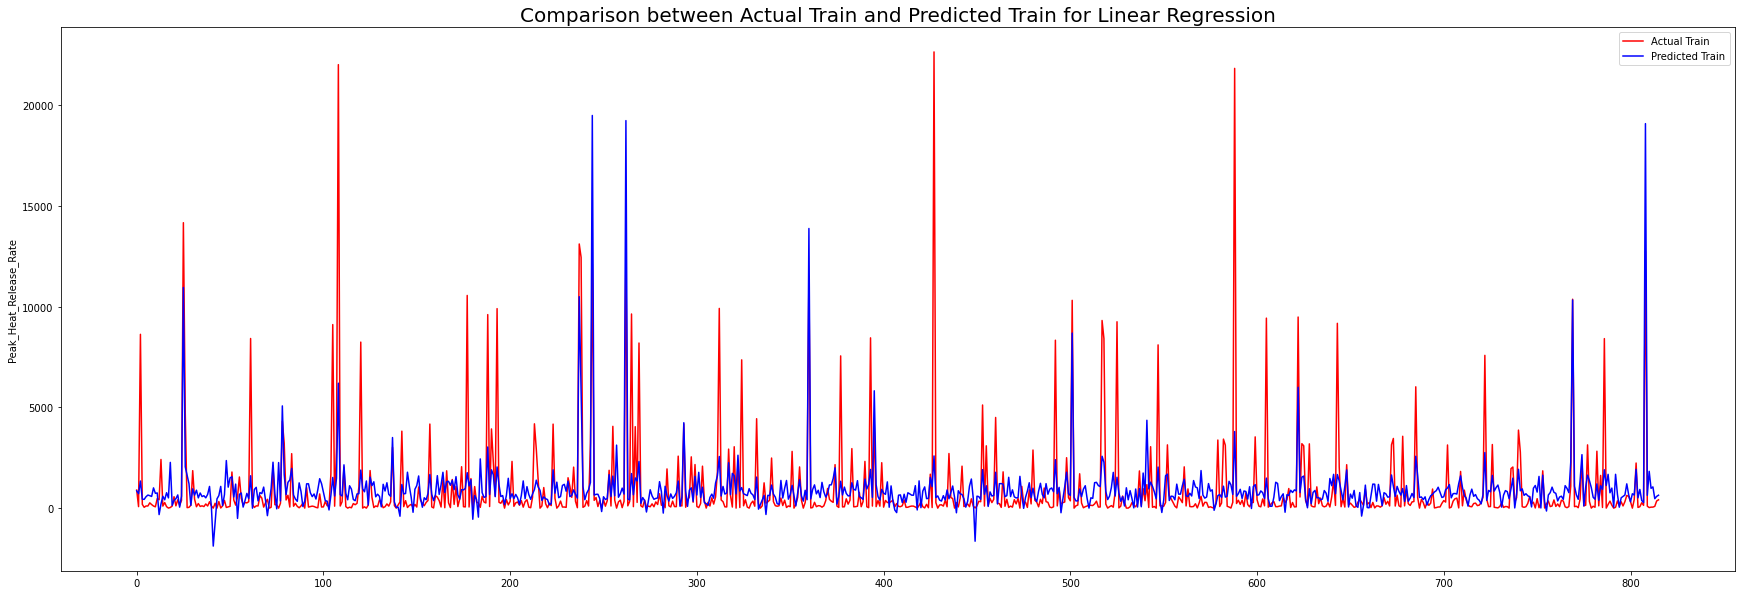

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( ytr, y_train, color = 'red', label = 'Actual Train')
sns.lineplot( ytr,y_pred_train_lr1, color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Linear Regression",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test for Linear Regression')

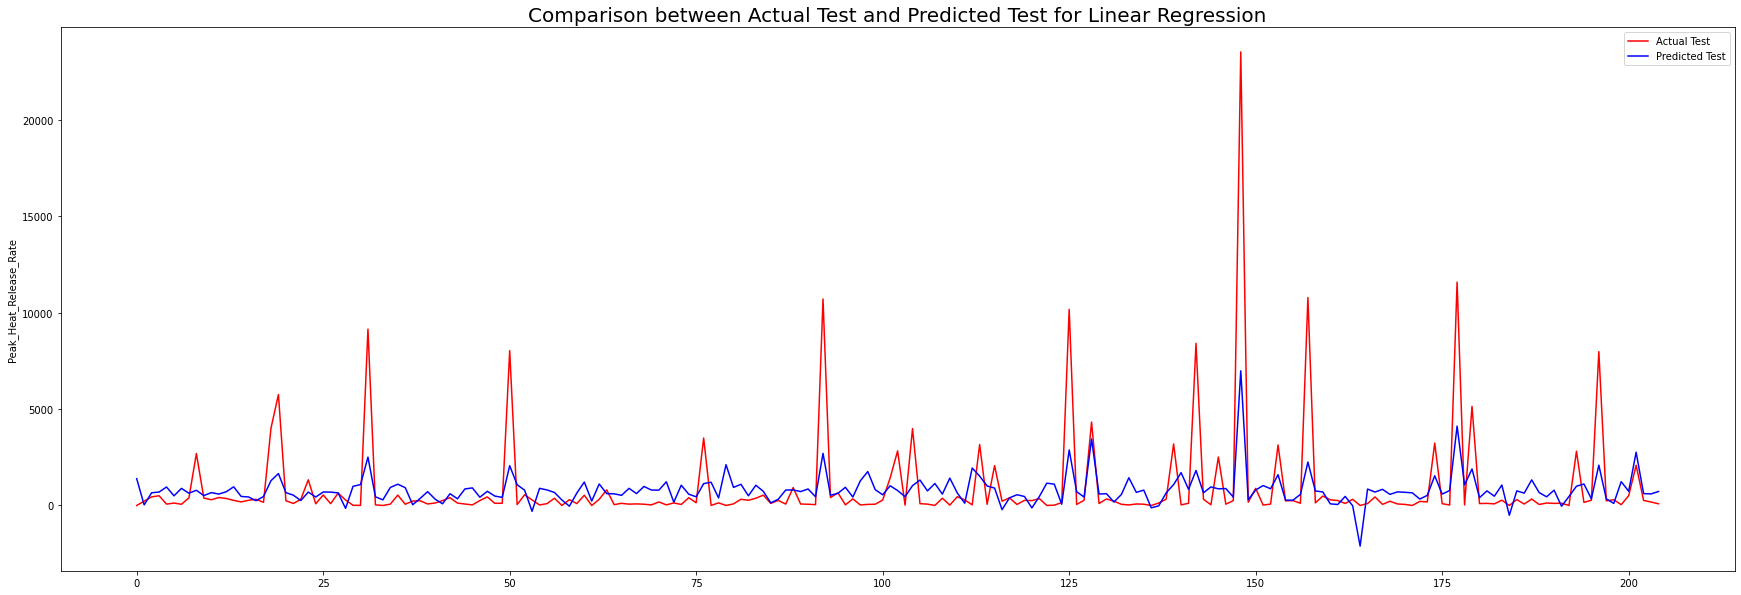

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( yt, y_test, color = 'red', label = 'Actual Test')
sns.lineplot( yt,y_pred_test_lr1, color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test for Linear Regression",fontsize=20)

In [ ]:
print(r2_score( y_train, y_pred_train_lr1))
print(r2_score( y_test, y_pred_test_lr1))

0.40736744498282784
0.377633397748647


In [ ]:
print(mean_absolute_percentage_error( y_train, y_pred_train_lr1))
print(mean_absolute_percentage_error( y_test, y_pred_test_lr1))

325.0477177364183
66.25113533374324


In [ ]:
print(mean_squared_error( y_train, y_pred_train_lr1, squared = False))
print(mean_squared_error( y_test, y_pred_test_lr1, squared = False))

1853.1509306871937
2019.4610882735922


In [ ]:
table.add_row(["Linear Regression", 0.4073,0.3776,1853.1509,2019.46108,325.04771,66.2511])

In [ ]:
print(table)

+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|     Model Name    | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
| Linear Regression |     0.4073     |     0.3776    |              1853.1509              |             2019.46108             |                 325.04771                  |                  66.2511                  |
+-------------------+----------------+---------------+-------------------------------------+--------------------------------

In [ ]:
error_train_lr2 = y_train - y_pred_train_lr1
error_test_lr1  = y_test - y_pred_test_lr1

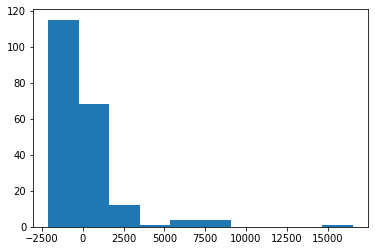

In [ ]:
plt.hist(error_test_lr1);

###**Polynomial Regression**


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_poly_train = poly.fit_transform(X_train_std)
X_poly_test = poly.transform(X_test_std)

In [ ]:
model = Lasso()
model.fit(X_poly_train,y_train)

Lasso()

In [ ]:
y_pred_train_poly = model.predict(X_poly_train)
y_pred_test_poly = model.predict(X_poly_test)

In [ ]:
poly_y_pred_train = model.predict(X_poly_train)
poly_train_accuracy = r2_score(y_train, poly_y_pred_train)
poly_y_pred_test = model.predict(X_poly_test)
poly_test_accuracy = r2_score(y_test, poly_y_pred_test)
print("Train R2 score for Polynomial Regression with degree 2 Model", round(poly_train_accuracy,4))
print("Test R2 score for Polynomial Regression with degree 2 Model", round(poly_test_accuracy,4))

Train R2 score for Polynomial Regression with degree 2 Model 0.7301
Test R2 score for Polynomial Regression with degree 2 Model 0.8263


In [ ]:
poly_y_pred_train = model.predict(X_poly_train)
poly_train_accuracy = mean_absolute_percentage_error(y_train, poly_y_pred_train)
poly_y_pred_test = model.predict(X_poly_test)
poly_test_accuracy = mean_absolute_percentage_error(y_test, poly_y_pred_test)
print("Train Mean Absolute Percentage Error Polynomial Regression with degree 2 Model", round(poly_train_accuracy,4))
print("Test Mean Absolute Percentage Error Polynomial Regression with degree 2 Model", round(poly_test_accuracy,4))

Train Mean Absolute Percentage Error Polynomial Regression with degree 2 Model 192.7771
Test Mean Absolute Percentage Error Polynomial Regression with degree 2 Model 51.808


In [ ]:
poly_y_pred_train = model.predict(X_poly_train)
poly_train_accuracy = mean_squared_error(y_train, poly_y_pred_train, squared = False)
poly_y_pred_test = model.predict(X_poly_test)
poly_test_accuracy = mean_squared_error(y_test, poly_y_pred_test, squared =  False)
print("Train Root Mean Squared Error Polynomial Regression with degree 2 Model", round(poly_train_accuracy,4))
print("Test Root Mean Squared Error Polynomial Regression with degree 2 Model", round(poly_test_accuracy,4))

Train Root Mean Squared Error Polynomial Regression with degree 2 Model 1250.6296
Test Root Mean Squared Error Polynomial Regression with degree 2 Model 1066.7603


In [ ]:
table.add_row(["Polynomial Regression", 0.7301, 0.8263, 1250.6296, 1066.7603,192.7771,51.808])

In [ ]:
print(table)

+-----------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|       Model Name      | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+-----------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|   Linear Regression   |     0.4073     |     0.3776    |              1853.1509              |             2019.46108             |                 325.04771                  |                  66.2511                  |
|     Decision Tree     |     0.9036     |     0.9341    |               747.3931              |            

Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Polynomial Regression with degree 2')

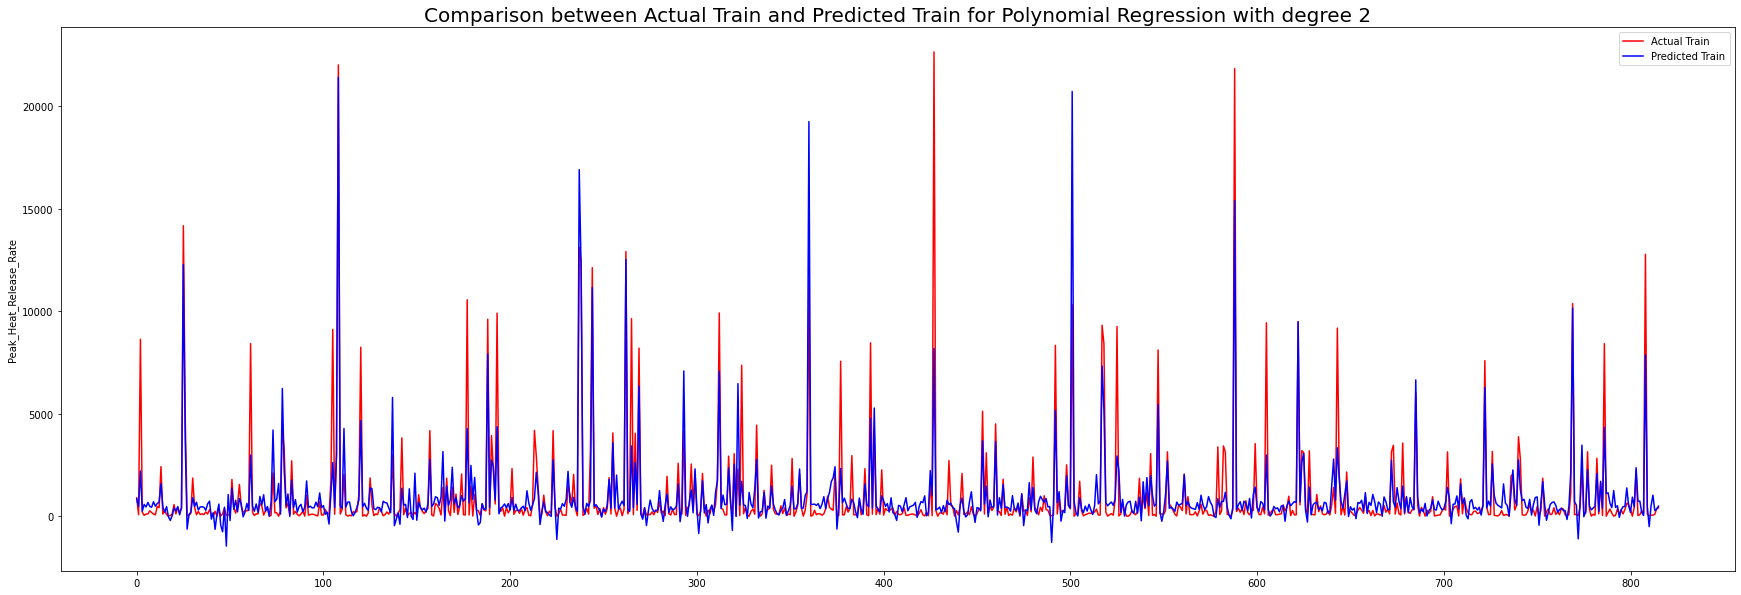

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( ytr, y_train, color = 'red', label = 'Actual Train')
sns.lineplot( ytr,y_pred_train_poly, color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Polynomial Regression with degree 2",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test for Polynomial Regression with degree 2')

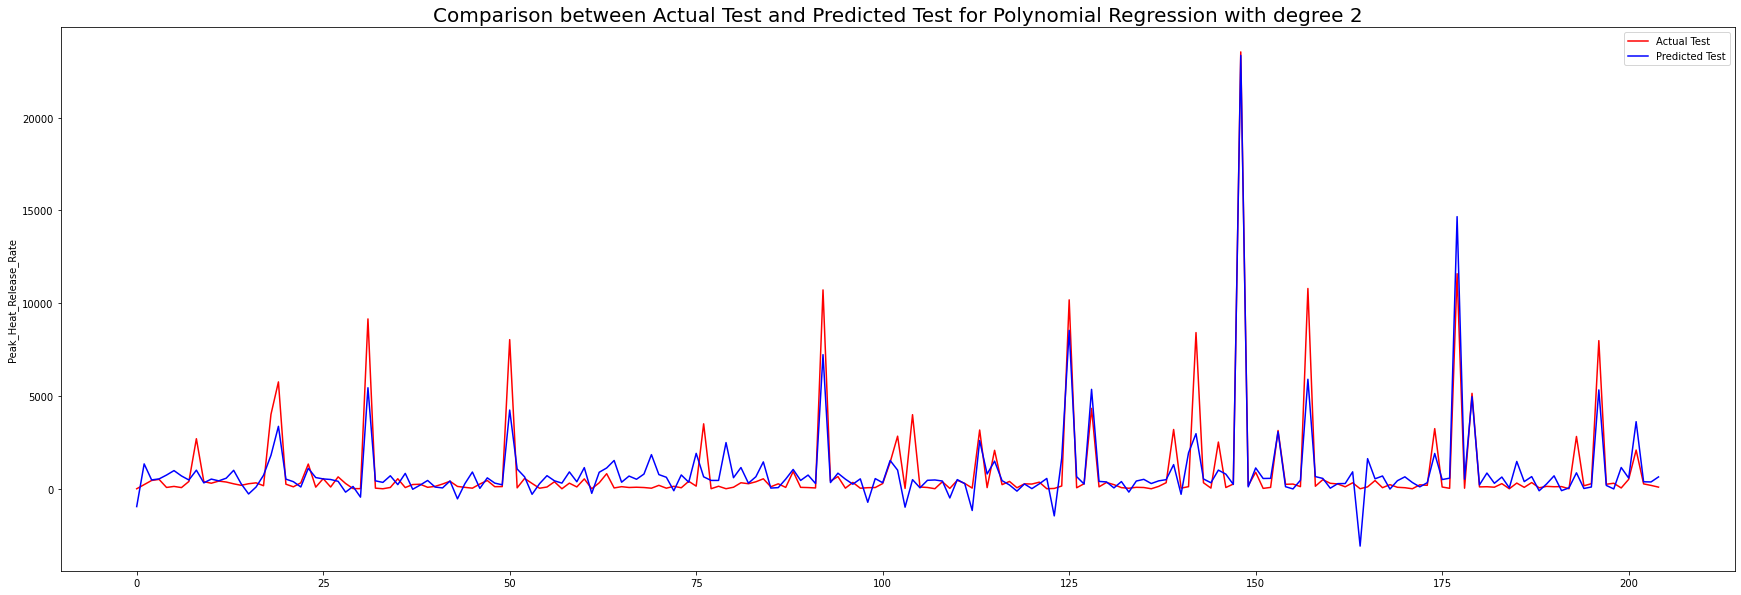

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( yt, y_test, color = 'red', label = 'Actual Test')
sns.lineplot( yt,y_pred_test_poly, color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test for Polynomial Regression with degree 2",fontsize=20)

###**Decision Tree**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Find optimal depth of trees

# Number of folds for Cross-Validation
folds = 5

# make lists of different parameters to check
parameters = {
  'max_depth':list(range(1, 10))
  }

# Initializing GridSearchCV
model = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=parameters, cv=folds, scoring='neg_root_mean_squared_error', return_train_score=True)

In [ ]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
# Find the best depth

best_depth = model.best_params_['max_depth']
print(f"The Best Parameter is: {model.best_params_}")

The Best Parameter is: {'max_depth': 4}


In [ ]:
# Fit a new model with best depth found above

dtree = DecisionTreeRegressor(max_depth=best_depth, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=0)

In [ ]:
y_pred_train_dt = dtree.predict(X_train)
y_pred_test_dt = dtree.predict(X_test)

Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Decision Tree')

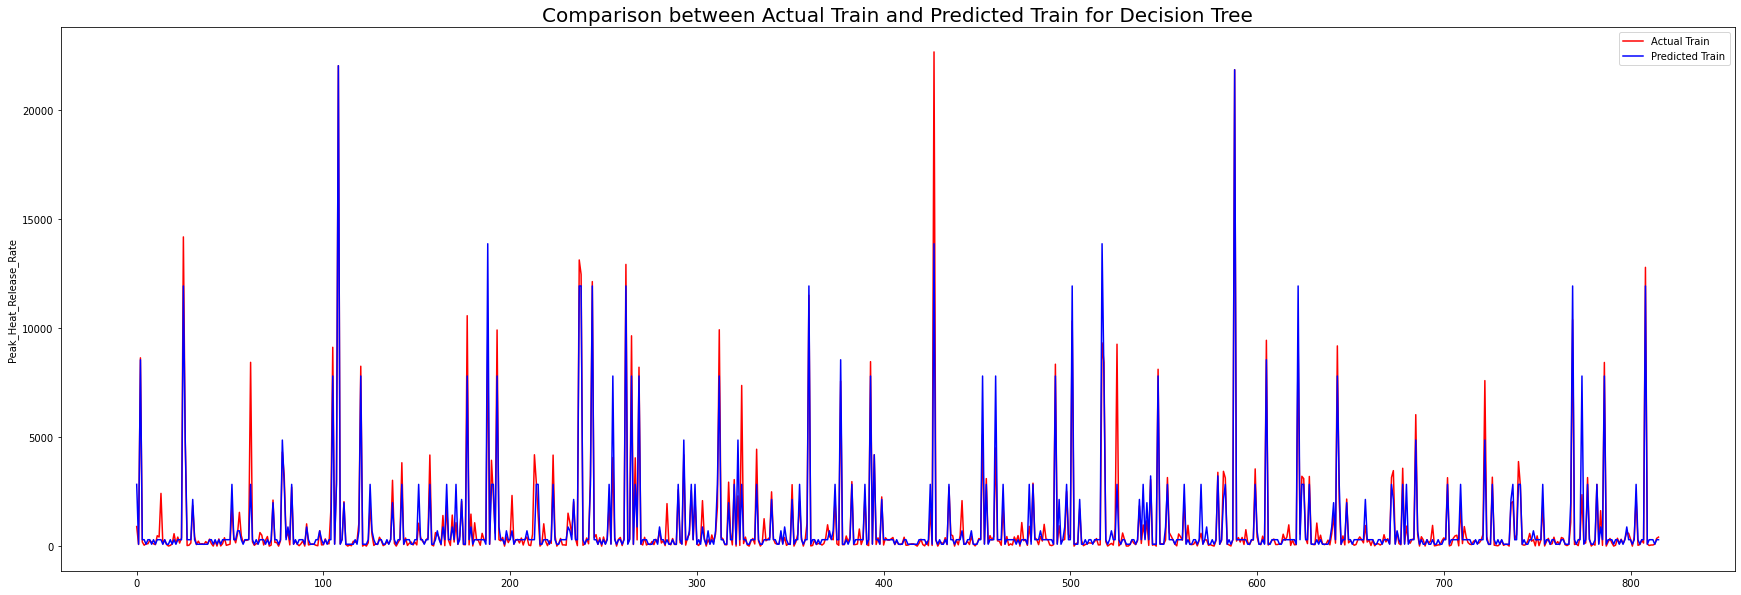

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( ytr, y_train, color = 'red', label = 'Actual Train')
sns.lineplot( ytr,y_pred_train_dt, color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Decision Tree",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test for Decision Tree')

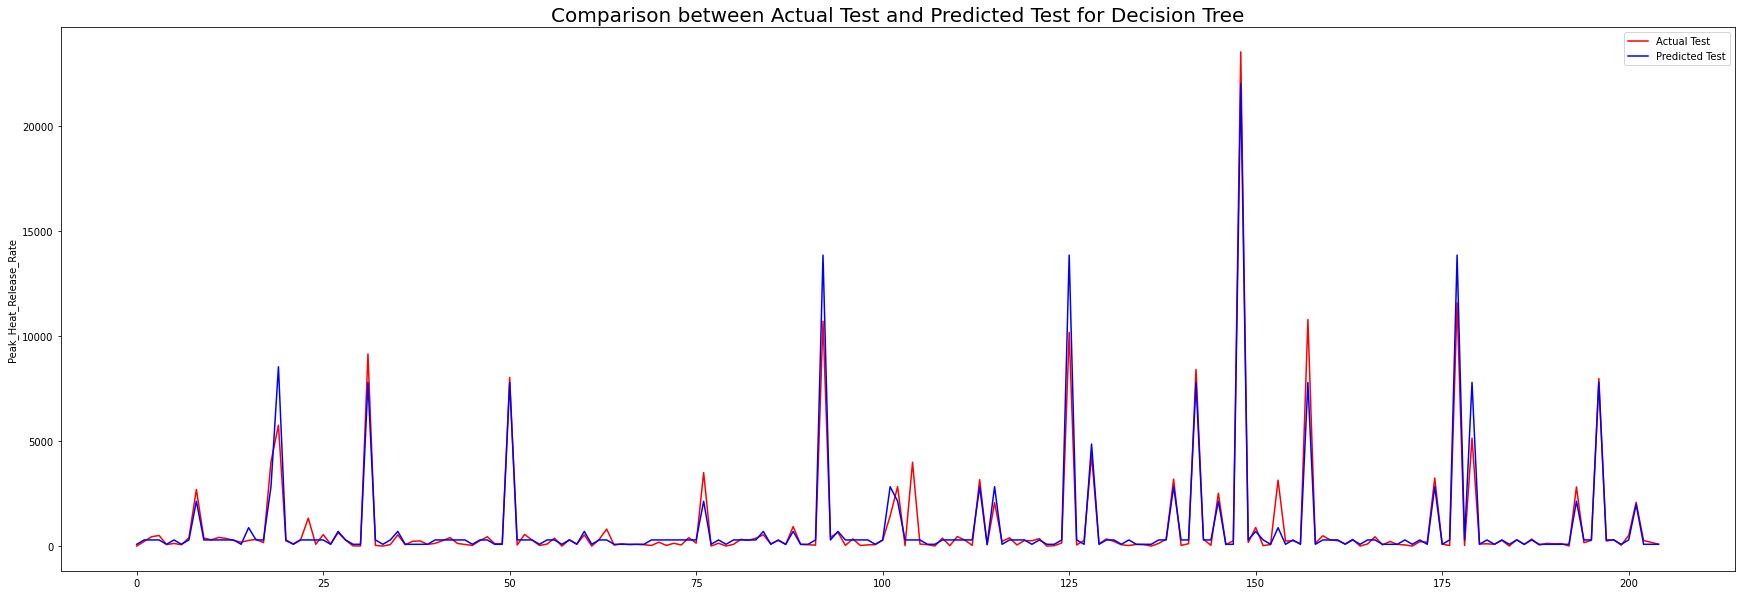

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( yt, y_test, color = 'red', label = 'Actual Test')
sns.lineplot( yt,y_pred_test_dt, color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test for Decision Tree",fontsize=20)

In [ ]:
error_train_dt = y_train - y_pred_train_dt
error_test_dt = y_test - y_pred_test_dt

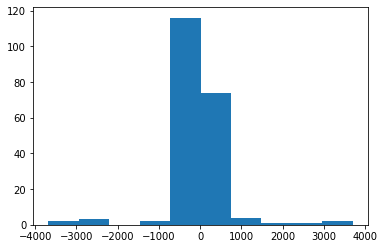

In [ ]:
plt.hist(error_test_dt);

In [ ]:
print("Train R2 score for Decision Tree",r2_score(y_train, y_pred_train_dt))
print("Test R2 score for Decision Tree",r2_score(y_test, y_pred_test_dt))

Train R2 score for Decision Tree 0.9036033067816056
Test R2 score for Decision Tree 0.9341475382018521


In [ ]:
print("Train Mean Absolute Percentage Error for Decision Tree",mean_absolute_percentage_error(y_train, y_pred_train_dt))
print("Test Mean Absolute Percentage Error for Decision Tree",mean_absolute_percentage_error(y_test, y_pred_test_dt))

Train Mean Absolute Percentage Error for Decision Tree 34.62152611152817
Test Mean Absolute Percentage Error for Decision Tree 6.62817250899853


In [ ]:
print("Train Root Mean Squared Error for Decision Tree",mean_squared_error(y_train, y_pred_train_dt, squared = False))
print("Test Root Mean Squared Error for Decision Tree",mean_squared_error(y_test, y_pred_test_dt, squared = False))

Train Root Mean Squared Error for Decision Tree 747.393140676251
Test Root Mean Squared Error for Decision Tree 656.8986318311325


In [ ]:
table.add_row(["Decision Tree", 0.9036, 0.9341,747.3931,656.8986, 34.6215, 6.6281])

In [ ]:
print(table)

+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|     Model Name    | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
| Linear Regression |     0.4073     |     0.3776    |              1853.1509              |             2019.46108             |                 325.04771                  |                  66.2511                  |
|   Decision Tree   |     0.9036     |     0.9341    |               747.3931              |              656.8986          

###**Random Forests**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {  'bootstrap': [True], 'max_depth': range(2,5), 'max_features': ['auto', 'log2', 'sqrt'], 'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 250]}

In [ ]:
rfr = RandomForestRegressor(random_state = 0)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 5, n_jobs = -1, verbose = 0,scoring='neg_root_mean_squared_error', return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 250}


In [ ]:

best_rf = RandomForestRegressor(n_estimators = 250, max_depth = 4 ,max_features = 'auto', random_state = 0)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=250, random_state=0)

In [ ]:
print(best_rf.score(X_test, y_test))

0.8799241149673819


In [ ]:
rf_y_pred_train = best_rf.predict(X_train)
rf_train_accuracy = r2_score(y_train, rf_y_pred_train)
rf_y_pred_test = best_rf.predict(X_test)
rf_test_accuracy = r2_score(y_test, rf_y_pred_test)
print("Train R2 score for Random Forest Model", round(rf_train_accuracy,4))
print("Test R2 score for Random Forest Model", round(rf_test_accuracy,4))

Train R2 score for Random Forest Model 0.9315
Test R2 score for Random Forest Model 0.8799


In [ ]:
rf_y_pred_train = best_rf.predict(X_train)
rf_train_accuracy = mean_absolute_percentage_error(y_train, rf_y_pred_train)
rf_y_pred_test = best_rf.predict(X_test)
rf_test_accuracy = mean_absolute_percentage_error(y_test, rf_y_pred_test)
print("Train Mean Absolute Percentage Error for Random Forest Model", round(rf_train_accuracy,4))
print("Test Mean Absolute Percentage Error for Random Forest Model", round(rf_test_accuracy,4))

Train Mean Absolute Percentage Error for Random Forest Model 38.7701
Test Mean Absolute Percentage Error for Random Forest Model 6.9149


In [ ]:
rf_y_pred_train = best_rf.predict(X_train)
rf_train_accuracy = mean_squared_error(y_train, rf_y_pred_train, squared = False)
rf_y_pred_test = best_rf.predict(X_test)
rf_test_accuracy = mean_squared_error(y_test, rf_y_pred_test, squared = False)
print("Train Root Mean Squared Error for Random Forest Model", round(rf_train_accuracy,4))
print("Train Root Mean Squared Error for Random Forest Model", round(rf_test_accuracy,4))

Train Root Mean Squared Error for Random Forest Model 630.0188
Train Root Mean Squared Error for Random Forest Model 887.034


Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Random Forest')

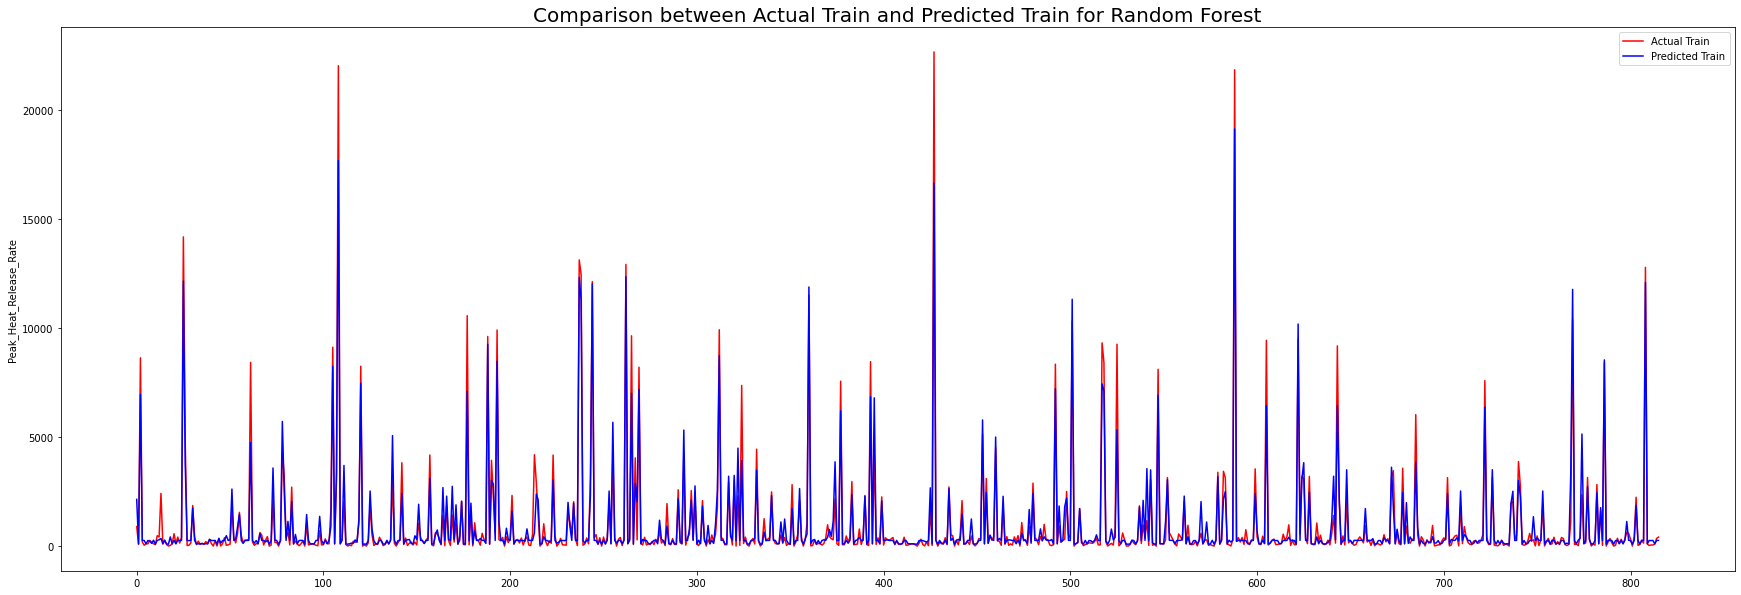

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( ytr, y_train, color = 'red', label = 'Actual Train')
sns.lineplot( ytr,rf_y_pred_train, color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Random Forest",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test for Random Forest')

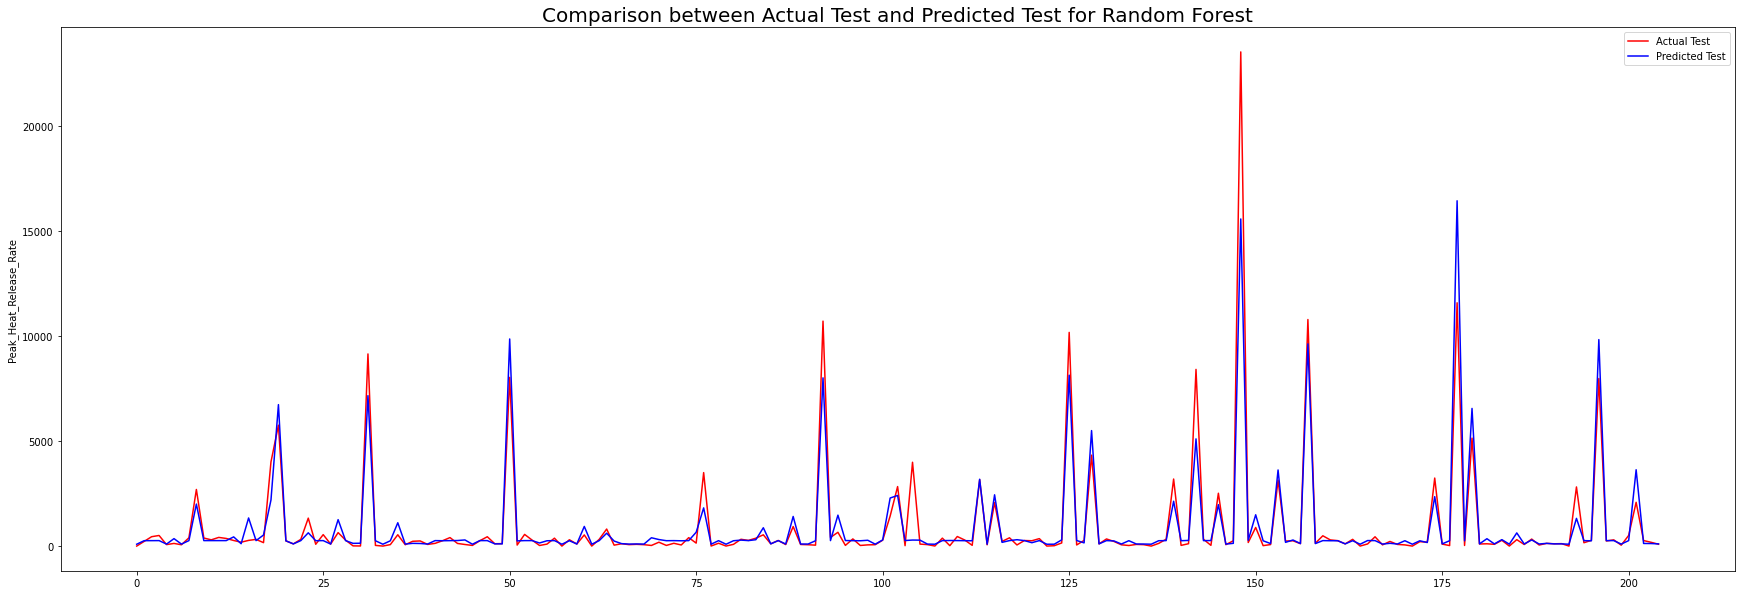

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( yt, y_test, color = 'red', label = 'Actual Test')
sns.lineplot( yt,rf_y_pred_test, color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test for Random Forest",fontsize=20)

In [ ]:
table.add_row(["Random Forest", 0.9315,0.8799,630.0188, 887.034,38.7701, 6.9149 ])

In [ ]:
print(table)

+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|     Model Name    | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
| Linear Regression |     0.4073     |     0.3776    |              1853.1509              |             2019.46108             |                 325.04771                  |                  66.2511                  |
|   Decision Tree   |     0.9036     |     0.9341    |               747.3931              |              656.8986          

In [ ]:
error_train_rf = y_train - rf_y_pred_train
error_test_rf = y_test - rf_y_pred_test

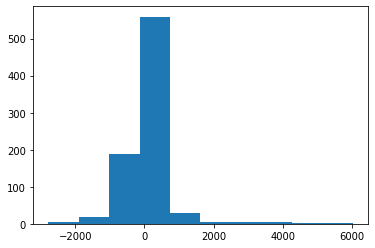

In [ ]:
plt.hist(error_train_rf);

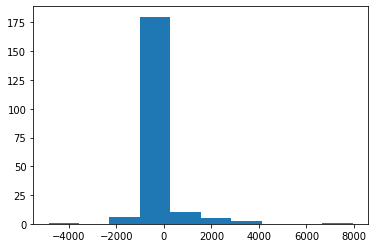

In [ ]:
plt.hist(error_test_rf);

In [ ]:
rf_result = permutation_importance(best_rf,X_train,y_train, random_state = 0)
cols = X_train.columns
mean = rf_result.importances_mean
std = rf_result.importances_std
df_rf_res = pd.DataFrame({'features':cols, 'importance':mean, 'importance_std': std}).sort_values('importance', ascending=False)

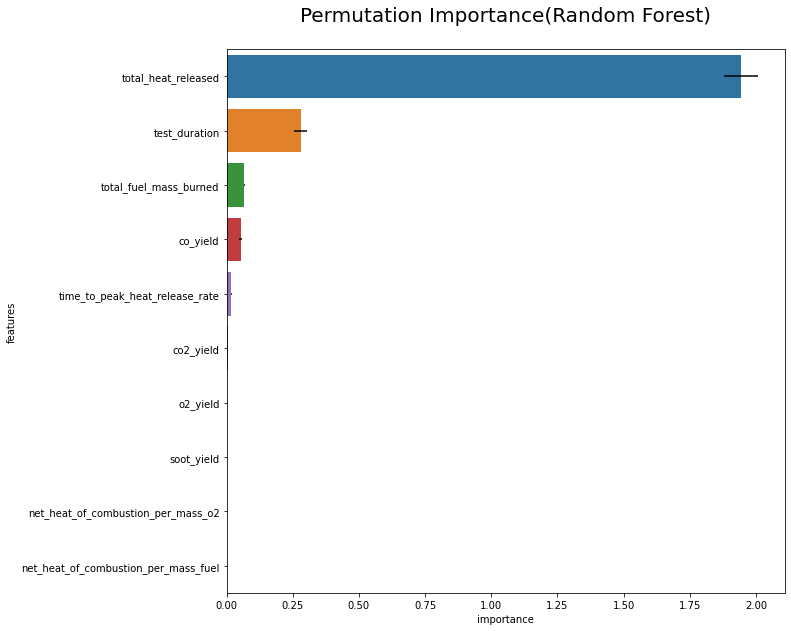

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='importance',y='features', data = df_rf_res, orient='h', xerr = df_rf_res["importance_std"] )
plt.title("Permutation Importance(Random Forest)\n", fontsize=20);

###**Boosting(Gradient Boosting)**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
param_grid = {'max_depth': range(2,10,2),  'learning_rate' : [0.001, 0.01, 0.1, 0.5],
              'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 250, 500, 1000]
              }

In [ ]:
gbc = GradientBoostingRegressor(random_state = 0)

g_search = GridSearchCV(estimator = gbc, param_grid = param_grid, 

                          cv = 5, n_jobs = -1, verbose = 0, scoring='neg_root_mean_squared_error', return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 150}


In [ ]:
best_gbc = GradientBoostingRegressor(n_estimators = 150, max_depth = 2 , learning_rate = 0.5  , random_state = 0)
best_gbc.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=2, n_estimators=150,
                          random_state=0)

In [ ]:
print(best_gbc.score(X_test, y_test))

0.8359931125752023


In [ ]:
gbc_y_pred_train = best_gbc.predict(X_train)
gbc_train_accuracy = r2_score(y_train, gbc_y_pred_train)
gbc_y_pred_test = best_gbc.predict(X_test)
gbc_test_accuracy = r2_score(y_test, gbc_y_pred_test)
print("Train R2 score for Gradient Boost Model", round(gbc_train_accuracy,4))
print("Test R2 score for Gradient Boost Model", round(gbc_test_accuracy,4))

Train R2 score for Gradient Boost Model 0.9978
Test R2 score for Gradient Boost Model 0.836


In [ ]:
gbc_y_pred_train = best_gbc.predict(X_train)
gbc_train_accuracy = mean_absolute_percentage_error(y_train, gbc_y_pred_train)
gbc_y_pred_test = best_gbc.predict(X_test)
gbc_test_accuracy = mean_absolute_percentage_error(y_test, gbc_y_pred_test)
print("Train Mean Absolute Percentage Error for Gradient Boost Model", round(gbc_train_accuracy,4))
print("Test Mean Absolute Percentage Error for Gradient Boost Model", round(gbc_test_accuracy,4))

Train Mean Absolute Percentage Error for Gradient Boost Model 13.0926
Test Mean Absolute Percentage Error for Gradient Boost Model 9.7401


In [ ]:
gbc_y_pred_train = best_gbc.predict(X_train)
gbc_train_accuracy = mean_squared_error(y_train, gbc_y_pred_train, squared = False)
gbc_y_pred_test = best_gbc.predict(X_test)
gbc_test_accuracy = mean_squared_error(y_test, gbc_y_pred_test, squared =  False)
print("Train Root Mean Squared Error for Gradient Boost Model", round(gbc_train_accuracy,4))
print("Test Root Mean Squared Error for Gradient Boost Model", round(gbc_test_accuracy,4))

Train Root Mean Squared Error for Gradient Boost Model 111.7371
Test Root Mean Squared Error for Gradient Boost Model 1036.6768


Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Random Forest')

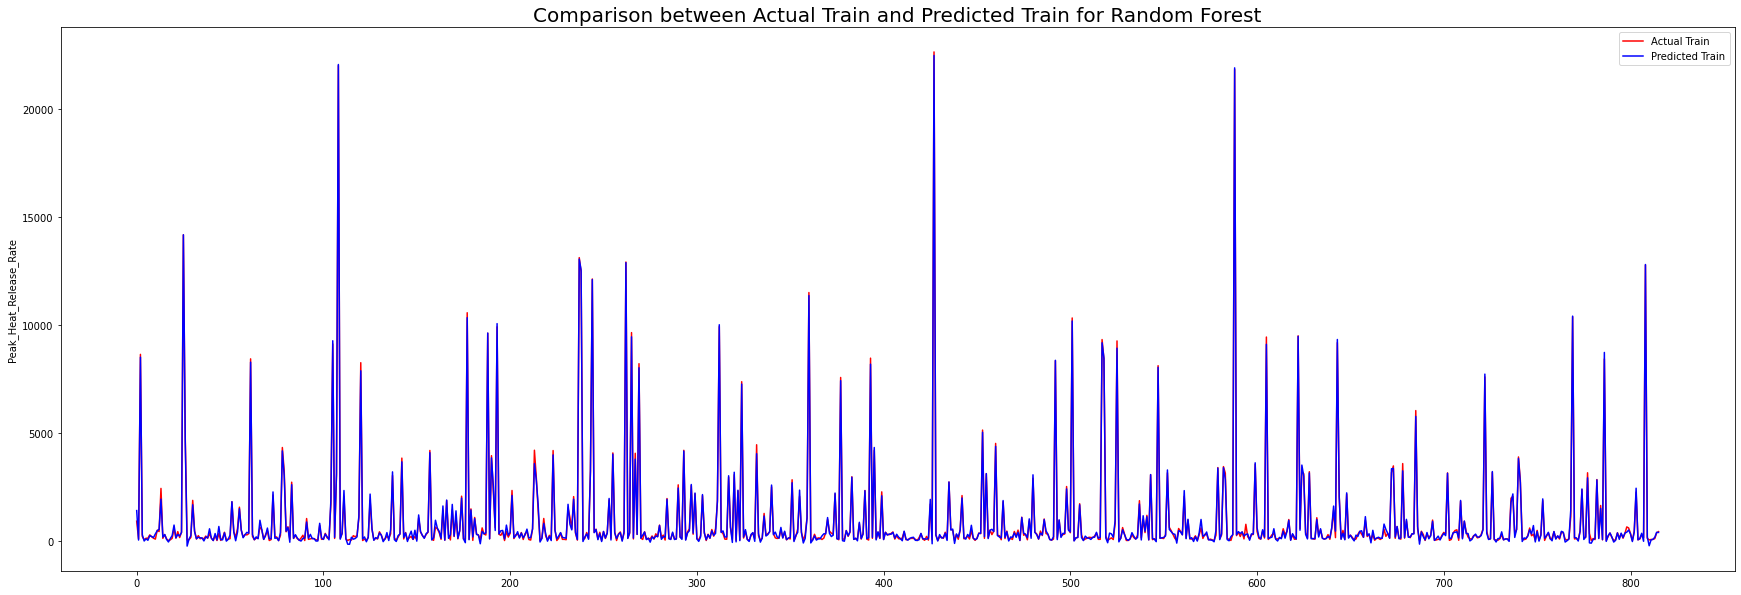

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( ytr, y_train, color = 'red', label = 'Actual Train')
sns.lineplot( ytr,gbc_y_pred_train, color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Random Forest",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test for Gradient Boosting')

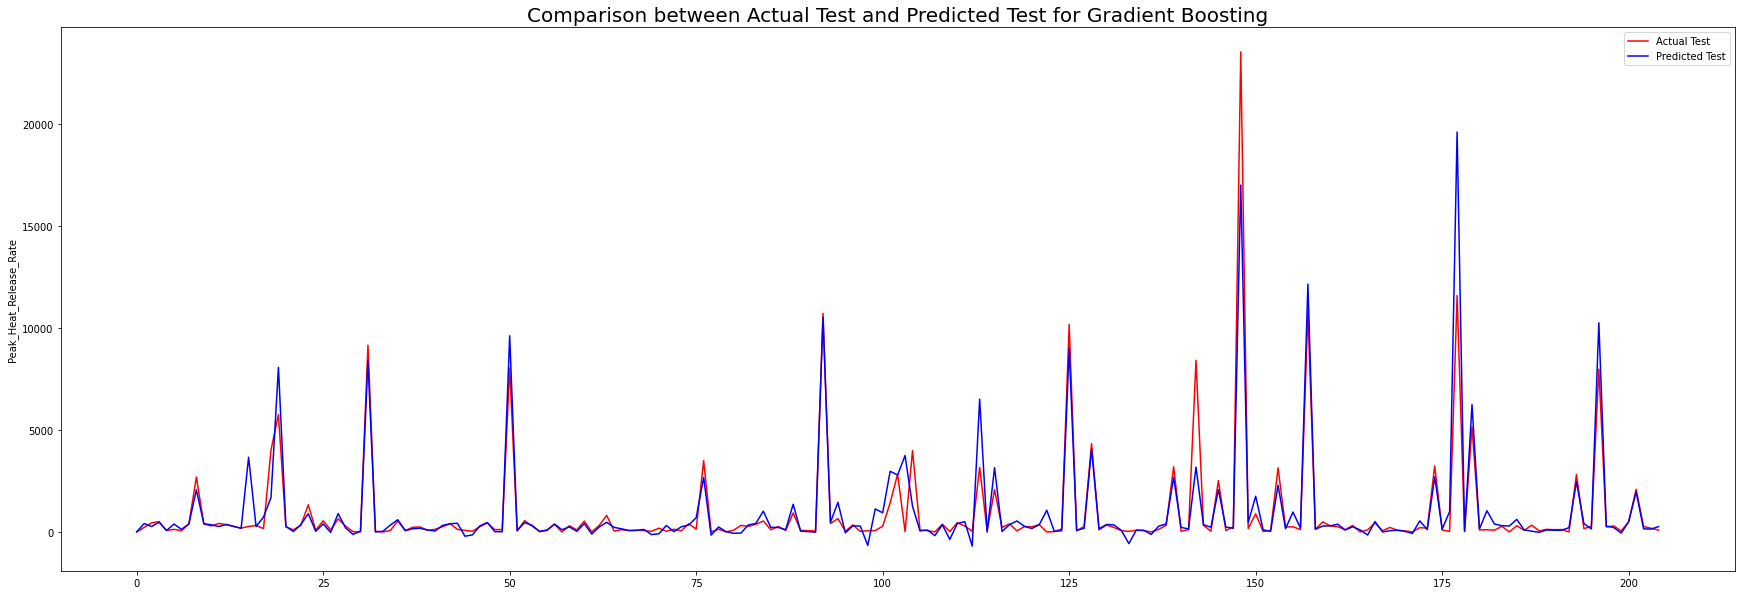

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( yt, y_test, color = 'red', label = 'Actual Test')
sns.lineplot( yt,gbc_y_pred_test, color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test for Gradient Boosting",fontsize=20)

In [ ]:
table.add_row(["Gradient Boosting", 0.9978, 0.836, 111.7371, 1036.6768,13.0926,9.7401 ])

In [ ]:
print(table)

+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|     Model Name    | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
| Linear Regression |     0.4073     |     0.3776    |              1853.1509              |             2019.46108             |                 325.04771                  |                  66.2511                  |
|   Decision Tree   |     0.9036     |     0.9341    |               747.3931              |              656.8986          

In [ ]:
gbc_result = permutation_importance(best_gbc,X_train,y_train, random_state = 0)
cols = X_train.columns
mean = gbc_result.importances_mean
std = gbc_result.importances_std
df_gbc_res = pd.DataFrame({'features':cols, 'importance':mean, 'importance_std': std}).sort_values('importance', ascending=False)

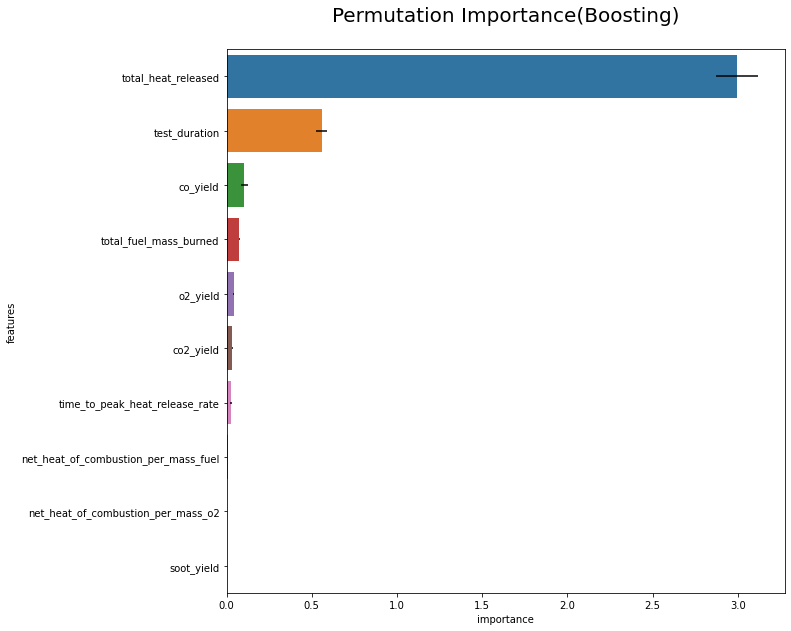

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='importance',y='features', data = df_gbc_res, orient='h', xerr = df_gbc_res["importance_std"] )
plt.title("Permutation Importance(Boosting)\n", fontsize=20);

##**Comparing all models**

In [ ]:
def r2_s(X,y,model):
  return r2_score(y, model.predict(X))

In [ ]:
print(table)

+-----------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|       Model Name      | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+-----------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|   Linear Regression   |     0.4073     |     0.3776    |              1853.1509              |             2019.46108             |                 325.04771                  |                  66.2511                  |
|     Decision Tree     |     0.9036     |     0.9341    |               747.3931              |            

[0.40736744498282784, 0.7300885236300803, 0.9036033067816056, 0.9315030986117248, 0.9978454376577486]
[0.377633397748647, 0.8263363091696447, 0.9341475382018521, 0.8799241149673819, 0.8359931125752023]


Text(0.5, 1.0, 'Comparison of Train and Test Accuracy Performance of All Models')

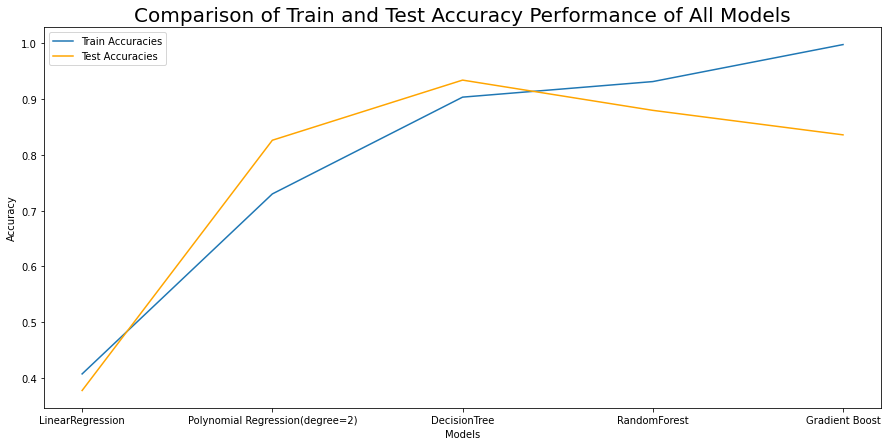

In [ ]:
model_names = ['LinearRegression','Polynomial Regression(degree=2)', 'DecisionTree', 'RandomForest', 'Gradient Boost']
model_objects = [lr,model, dtree, best_rf, best_gbc]
train_acc = [r2_s(X_train_std, y_train, lr), r2_s(X_poly_train, y_train, model), r2_s(X_train, y_train, dtree), r2_s(X_train, y_train, best_rf), r2_s(X_train, y_train, best_gbc)]
test_acc = [r2_s(X_test_std, y_test, lr),r2_s(X_poly_test, y_test, model), r2_s(X_test, y_test, dtree), r2_s(X_test, y_test, best_rf), r2_s(X_test, y_test, best_gbc)]
print(train_acc)
print(test_acc)
plt.figure(figsize=(15, 7))
plt.plot(model_names, train_acc, label='Train Accuracies')
plt.plot(model_names, test_acc, color='orange', label='Test Accuracies')
plt.legend()
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Comparison of Train and Test Accuracy Performance of All Models", fontdict={'fontsize': 20})

In [ ]:
X.describe()

,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration
count,1021.000000,1021.000000,1.021000e+03,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,10.152057,990.737018,2.995084e+01,39.208472,13.057228,2.940607,2.526776,0.060396,0.035566,20.485608
std,14.517925,5939.714372,1.974975e+02,12.438269,1.036665,9.196242,6.456616,0.128093,1.141147,24.612943
min,0.030000,0.000020,4.319654e-07,15.000000,11.900000,-219.874777,-81.809539,-1.691749,-15.778332,0.383333
25%,4.150000,3.518380,7.344828e-02,30.000000,12.540000,1.888454,2.031006,0.016144,0.000584,6.550000
50%,5.780000,6.992730,1.496578e-01,46.400000,12.780000,3.543544,2.680585,0.048195,0.004593,9.516667
75%,11.000000,140.795900,4.381393e+00,50.000000,13.100000,3.780794,3.005756,0.090053,0.033652,24.100000
max,202.650000,90479.481550,3.929646e+03,50.000000,17.800000,180.629735,180.711317,3.199748,32.198598,247.300000


In [ ]:
X_train.describe()

,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration
count,816.000000,816.000000,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,10.117696,1086.401721,3.395850e+01,39.191385,13.054547,2.925606,2.530852,0.060249,0.042417,20.992322
std,14.647235,6510.819368,2.191664e+02,12.429901,1.026674,10.261359,7.197504,0.140507,1.275362,26.078163
min,0.030000,0.000020,4.319654e-07,15.000000,11.900000,-219.874777,-81.809539,-1.691749,-15.778332,0.383333
25%,4.150000,3.529835,7.404493e-02,30.000000,12.540000,1.876380,1.996787,0.015799,0.000568,6.566667
50%,5.820000,7.350585,1.594623e-01,46.400000,12.780000,3.538725,2.680567,0.047036,0.004617,9.616667
75%,10.820000,152.397925,4.963713e+00,50.000000,13.100000,3.779688,3.000198,0.088873,0.035566,24.475000
max,202.650000,90479.481550,3.929646e+03,50.000000,17.800000,180.629735,180.711317,3.199748,32.198598,247.300000


In [ ]:
X_test.describe()

,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,10.288829,609.944832,13.998397,39.276488,13.067902,3.000319,2.510550,0.060980,0.008295,18.468640
std,14.025437,2619.816069,52.972931,12.501777,1.078037,1.477841,1.215236,0.056281,0.109230,17.519159
min,0.170000,0.014570,0.000486,15.930000,11.900000,-1.162756,-1.241012,-0.100217,-1.504715,1.516667
25%,4.070000,3.324100,0.069357,27.790000,12.540000,1.903301,2.105026,0.017459,0.000728,6.416667
50%,5.730000,6.088780,0.128888,46.400000,12.780000,3.587856,2.689319,0.051894,0.004373,9.366667
75%,11.380000,102.568430,3.578003,50.000000,13.100000,3.795832,3.065557,0.093497,0.028621,22.750000
max,127.130000,28734.135000,574.682700,50.000000,17.800000,15.125881,14.858069,0.256918,0.153004,78.200000


#**Augmented Data**

##**Importing Libraries and Reading the Data**

In [ ]:
import json
import urllib.request
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.utils import shuffle

In [ ]:
df_aug = pd.read_csv("/content/df_augmented.csv", index_col = 0)

In [ ]:
df_aug.head()

,Peak_Heat_Release_Rate,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration,fuel_type
0,95.029878,21.437567,169.275600,10.007747,17.283111,12.761973,1.289253,0.952221,0.121976,0.007354,55.817289,"PVC, Natural Gas"
1,95.369161,21.390054,176.095985,9.740837,16.452766,12.793619,1.183770,1.003292,0.102805,0.007395,55.818387,"PVC, Natural Gas"
2,94.438043,21.390338,180.844898,10.012727,17.126395,12.992410,1.163613,0.976422,0.110589,0.011404,55.810260,"PVC, Natural Gas"
3,99.259395,21.458463,173.348368,10.006249,16.637775,12.331015,1.290913,1.005947,0.112156,0.012201,55.810768,"PVC, Natural Gas"
4,93.069798,21.405776,171.868892,10.593868,17.147787,12.709149,1.294114,1.046823,0.112464,0.006001,55.808434,"PVC, Natural Gas"


In [ ]:
df_aug.drop("fuel_type",axis=1, inplace = True)

In [ ]:
df_aug.isnull().sum()

Peak_Heat_Release_Rate                  0
time_to_peak_heat_release_rate          0
total_heat_released                     0
total_fuel_mass_burned                  0
net_heat_of_combustion_per_mass_fuel    0
net_heat_of_combustion_per_mass_o2      0
o2_yield                                0
co2_yield                               0
co_yield                                0
soot_yield                              0
test_duration                           0
dtype: int64

In [ ]:
df_aug = shuffle(df_aug)

In [ ]:
df_aug.head()

,Peak_Heat_Release_Rate,time_to_peak_heat_release_rate,total_heat_released,total_fuel_mass_burned,net_heat_of_combustion_per_mass_fuel,net_heat_of_combustion_per_mass_o2,o2_yield,co2_yield,co_yield,soot_yield,test_duration
30458,75.796329,3.904484,2.652949,0.052748,46.782075,13.192527,4.587491,3.747232,0.081625,0.005742,5.203142
13654,767.723599,0.383822,62.563152,1.891820,34.645299,12.932510,2.742581,2.840289,0.094947,0.057844,9.130679
33631,135.360609,4.903365,85.187136,1.536734,54.328760,12.544439,3.807452,2.768857,-0.002128,-0.127952,17.766673
86087,81.120579,16.857384,51.720111,1.748158,32.264050,13.514266,2.834581,2.604340,0.026238,0.004488,36.036157
73628,107.108618,9.635058,66.125133,2.619008,25.109561,13.145618,1.813006,1.870653,0.034694,0.093396,21.516563


In [ ]:
import json
import urllib.request
import pandas as pd
import numpy as np
from prettytable import PrettyTable

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold


from sklearn import tree
from sklearn.ensemble import RandomForestRegressor


from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.inspection import permutation_importance

from itertools import product, permutations
from collections import OrderedDict
from prettytable import PrettyTable
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
from operator import itemgetter 
import random
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
table = PrettyTable(["Model Name", "R2 Score_train",  "R2 Score_test", "Root Mean Squared Error(RMSE)_train", "Root Mean Squared Error(RMSE)_test" ,"Mean Absolute Percentage Error(MAPE)_train","Mean Absolute Percentage Error(MAPE)_test"])

##**Data Preparation**

In [ ]:
X = df_aug.drop(['Peak_Heat_Release_Rate'], axis = 1)
y = df_aug['Peak_Heat_Release_Rate']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
ytr = [i for i in range(len(y_train))]
yt = [i for i in range(len(y_test))]

Text(0.5, 1.0, 'Distribution of Peak Heat Release Rate for Test Dataset')

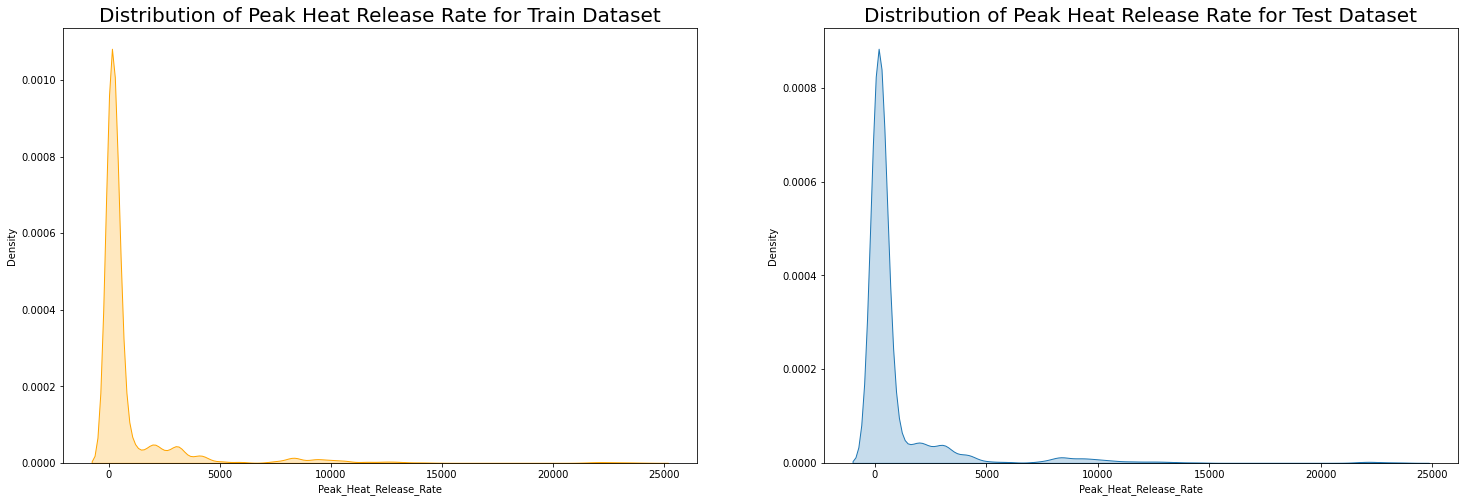

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,8))
sns.kdeplot(y_train, color = 'orange', shade = True, ax = ax[0])
sns.kdeplot(y_test, shade = True, ax = ax[1])
ax[0].set_title("Distribution of Peak Heat Release Rate for Train Dataset", fontdict={'fontsize': 20})
ax[1].set_title("Distribution of Peak Heat Release Rate for Test Dataset", fontdict={'fontsize': 20})

In [ ]:
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train), columns = X.columns)
X_test_std = pd.DataFrame(sc.transform(X_test), columns = X.columns)

##**Modeling**

###**Linear Regression**

In [ ]:
lr = LinearRegression()
lr.fit(X_train_std, y_train)
y_pred_train_lr1 = lr.predict(X_train_std)
y_pred_test_lr1 = lr.predict(X_test_std)

In [ ]:
print("Train r2 score for linear regression", r2_score( y_train, y_pred_train_lr1))
print("Test r2 score for linear regression", r2_score( y_test, y_pred_test_lr1))

Train r2 score for linear regression 0.38662672250032015
Test r2 score for linear regression 0.3772907980952672


In [ ]:
print("Train Mean Absolute Percentage Error for linear regression",mean_absolute_percentage_error( y_train, y_pred_train_lr1))
print("Train Mean Absolute Percentage Error for linear regression",mean_absolute_percentage_error( y_test, y_pred_test_lr1))

Train Mean Absolute Percentage Error for linear regression 337.68740054004445
Train Mean Absolute Percentage Error for linear regression 332.3830213746424


In [ ]:
print("Train Root Mean Squared Error for linear regression",mean_squared_error( y_train, y_pred_train_lr1,squared = False))
print("Train Root Mean Squared Error for linear regression",mean_squared_error( y_test, y_pred_test_lr1, squared = False))

Train Root Mean Squared Error for linear regression 1912.3278321509981
Train Root Mean Squared Error for linear regression 1921.1769634542181


In [ ]:
table.add_row(["Linear Regression",0.3866, 0.3772, 1912.3278, 1921.1769,337.6874, 332.38302])

In [ ]:
print(table)

+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|     Model Name    | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+-------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
| Linear Regression |     0.3866     |     0.3772    |              1912.3278              |             1921.1769              |                  337.6874                  |                 332.38302                 |
+-------------------+----------------+---------------+-------------------------------------+--------------------------------



```
Selecting random points from the data as the number of data points is large and for small number of data points it will be easier to visualise.
```



In [ ]:
indices_tr = random.sample(range(0, len(ytr)), 820)
indices_t = random.sample(range(0,len(yt)),180)

Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Linear Regression')

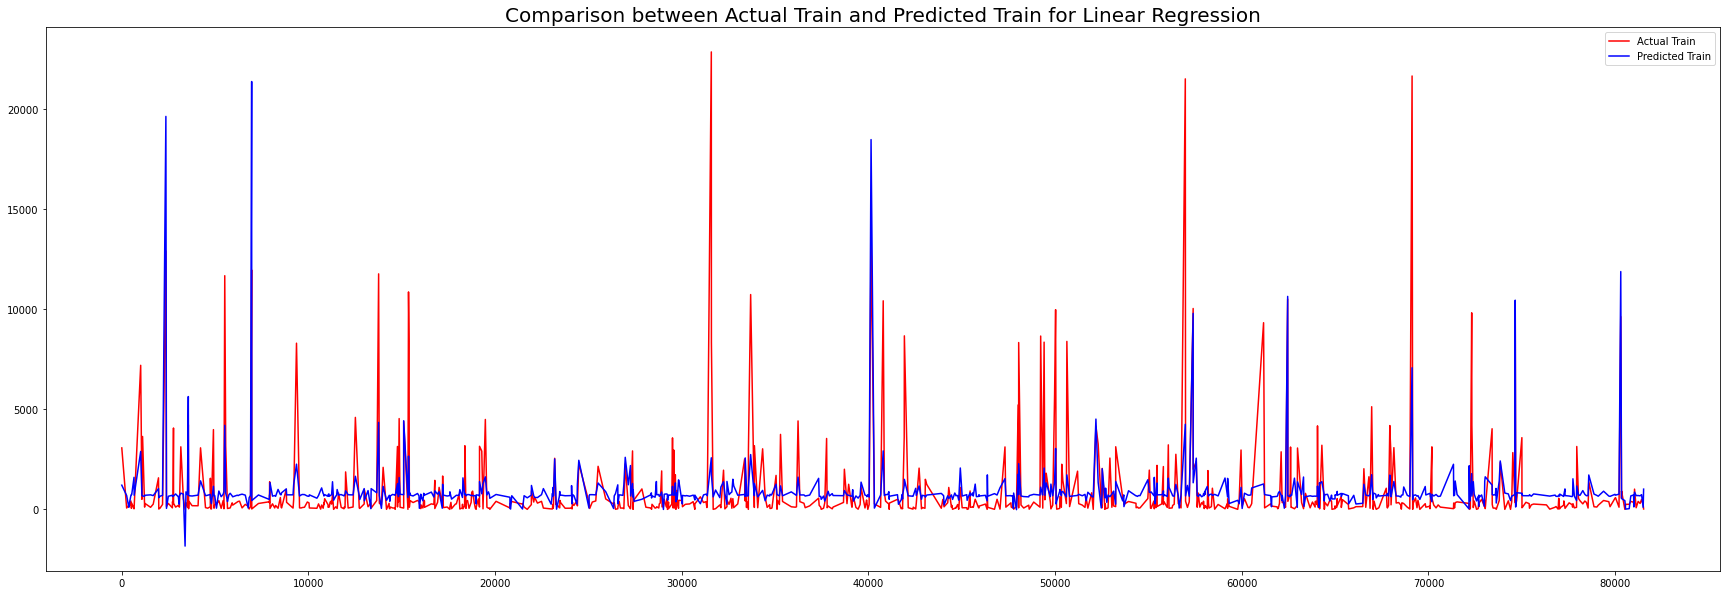

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( itemgetter(*indices_tr)(ytr), list(y_train.iloc[indices_tr]), color = 'red', label = 'Actual Train')
sns.lineplot( itemgetter(*indices_tr)(ytr),list(y_pred_train_lr1[indices_tr]), color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Linear Regression",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test for Linear Regression')

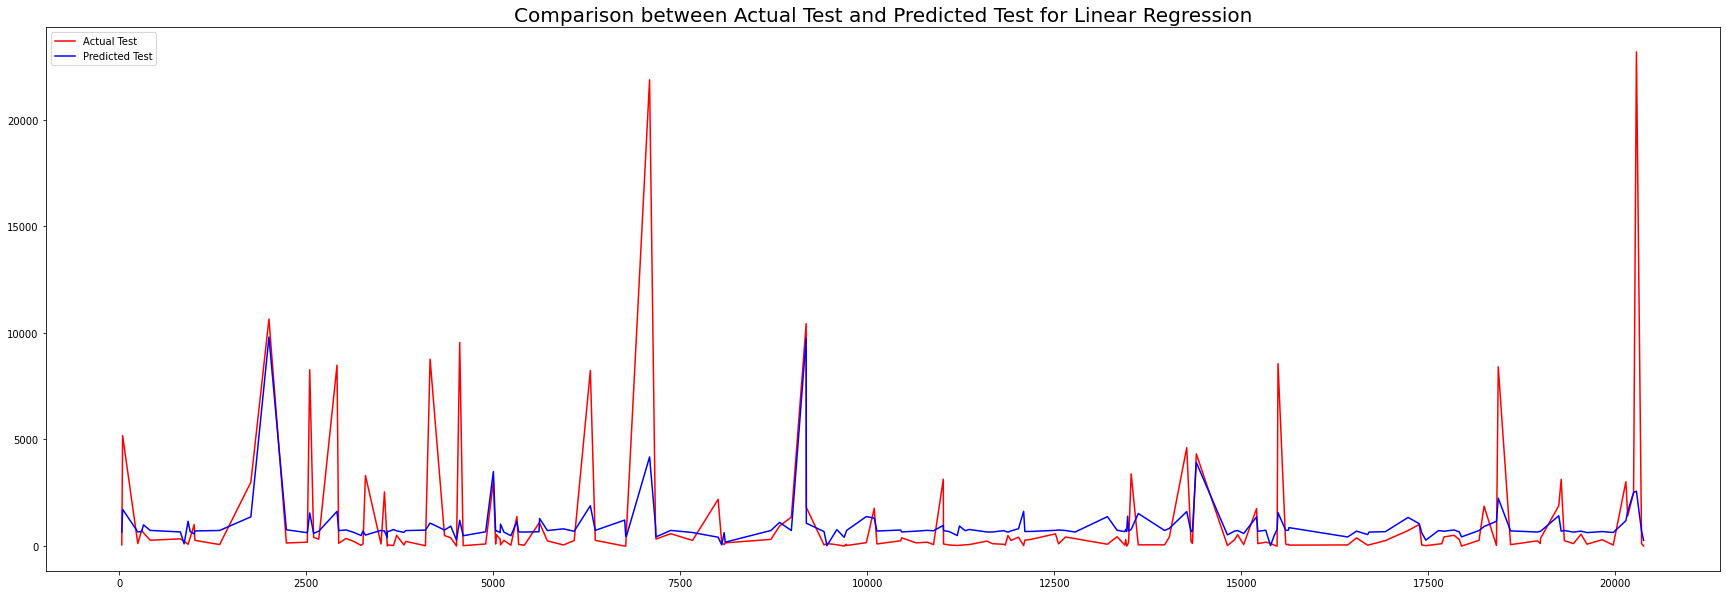

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(itemgetter(*indices_t)(yt), list(y_test.iloc[indices_t]), color = 'red', label = 'Actual Test')
sns.lineplot( itemgetter(*indices_t)(yt),list(y_pred_test_lr1[indices_t]), color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test for Linear Regression",fontsize=20)

###**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
param_grid = [
    {'poly__degree': [2, 3, 4, 5]}
  ]
pipeline = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])
grid_search = GridSearchCV(pipeline, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid=[{'poly__degree': [2, 3, 4, 5]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'poly__degree': 3}

In [ ]:
poly = PolynomialFeatures(degree = 3)
xtrain_poly = poly.fit_transform(X_train_std)
xtest_poly = poly.transform(X_test_std)

In [ ]:
poly_reg = Ridge()
poly_reg.fit(xtrain_poly, y_train)

Ridge()

In [ ]:
y_pred_train_poly  = poly_reg.predict(xtrain_poly)
y_pred_test_poly = poly_reg.predict(xtest_poly)

In [ ]:
poly_train_accuracy = r2_score(y_train, y_pred_train_poly)
poly_test_accuracy = r2_score(y_test, y_pred_test_poly)
print("Train R2 score for Ridge Regression of Degree 3 Model", round(poly_train_accuracy,4))
print("Test R2 score for Ridge Regression of Degree 3 Model", round(poly_test_accuracy,4))

Train R2 score for Ridge Regression of Degree 3 Model 0.8844
Test R2 score for Ridge Regression of Degree 3 Model 0.8576


In [ ]:
poly_train_accuracy = mean_absolute_percentage_error(y_train, y_pred_train_poly)
poly_test_accuracy = mean_absolute_percentage_error(y_test, y_pred_test_poly)
print("Train Mean Absolute Percentage Error for Ridge Regression of Degree 3 Model", round(poly_train_accuracy,4))
print("Test Mean Absolute Percentage Error for Ridge Regression of Degree 3 Model", round(poly_test_accuracy,4))

Train Mean Absolute Percentage Error for Ridge Regression of Degree 3 Model 123.168
Test Mean Absolute Percentage Error for Ridge Regression of Degree 3 Model 125.6994


In [ ]:
poly_train_accuracy = mean_squared_error(y_train, y_pred_train_poly, squared = False)
poly_test_accuracy = mean_squared_error(y_test, y_pred_test_poly, squared =  False)
print("Train Root Mean Squared Error for Ridge Regression of Degree 3 Model", round(poly_train_accuracy,4))
print("Test Root Mean Squared Error for Ridge Regression of Degree 3 Model", round(poly_test_accuracy,4))

Train Root Mean Squared Error for Ridge Regression of Degree 3 Model 830.0798
Test Root Mean Squared Error for Ridge Regression of Degree 3 Model 918.5566


In [ ]:
table.add_row(["Polynomial Regression(degree=3)", 0.8844, 0.8576,830.0798,918.5566, 123.168, 125.6994])

In [ ]:
print(table)

+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|            Model Name           | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|        Linear Regression        |     0.3866     |     0.3772    |              1912.3278              |             1921.1769              |                  337.6874                  |                 332.38302                 |
| Polynomial Regression(degree=3) |     0.8844     |     0.8576    |

Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Polynomial Regression with degree 3')

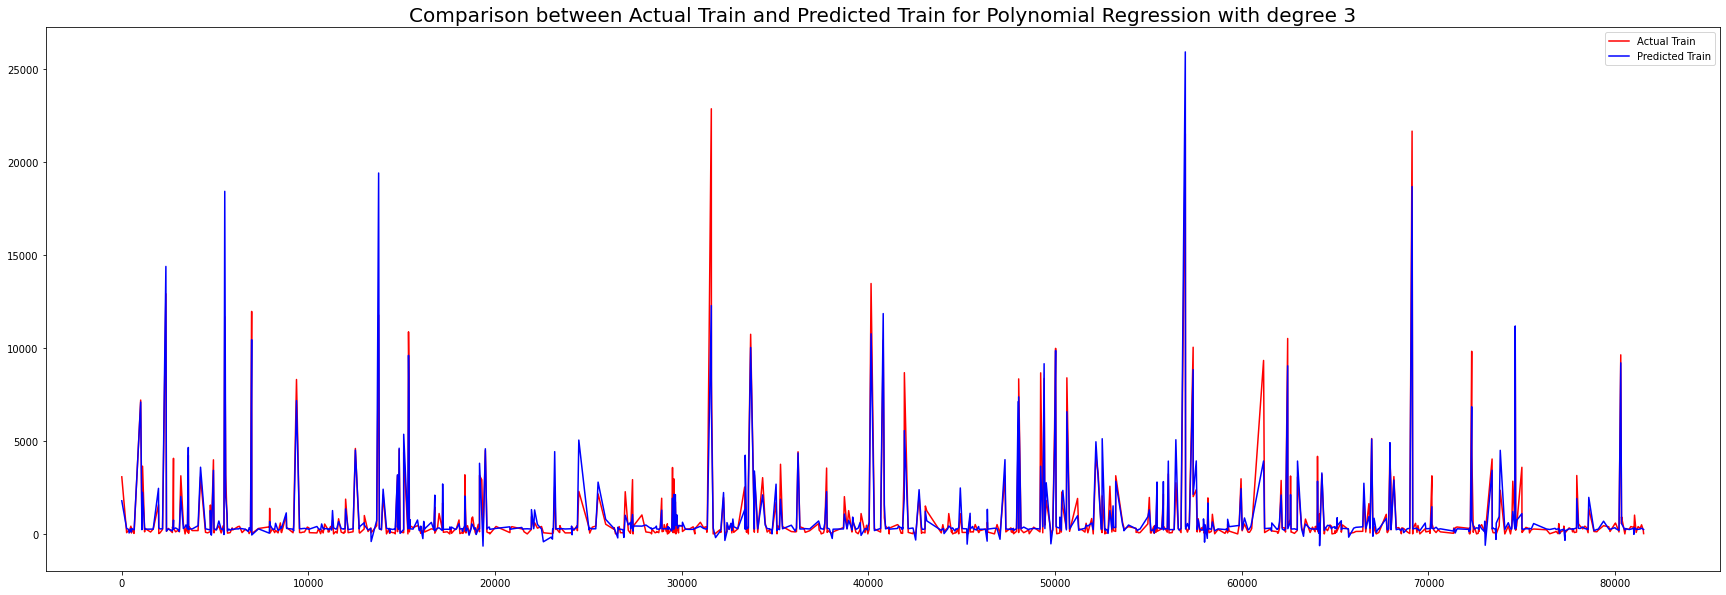

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( itemgetter(*indices_tr)(ytr), list(y_train.iloc[indices_tr]), color = 'red', label = 'Actual Train')
sns.lineplot( itemgetter(*indices_tr)(ytr),list(y_pred_train_poly[indices_tr]), color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Polynomial Regression with degree 3",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test forPolynomial Regression with degree 3')

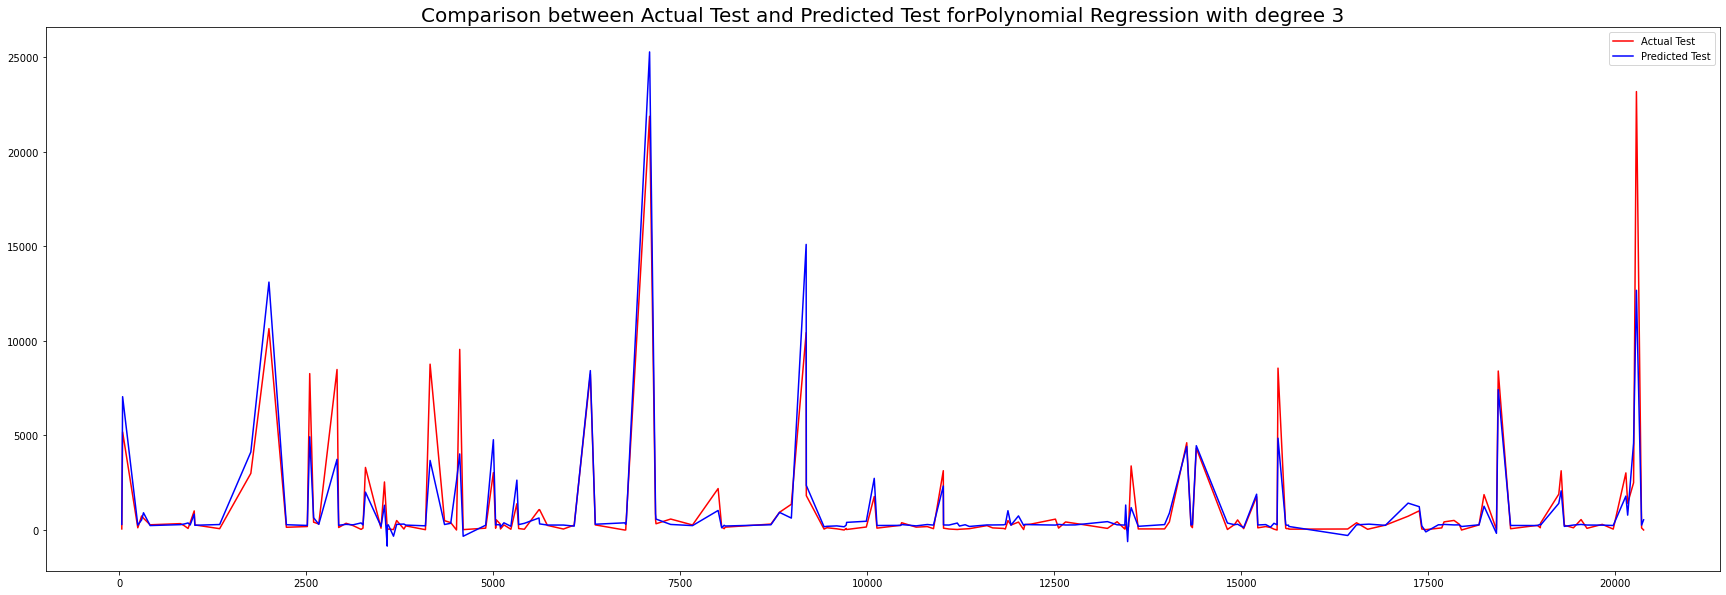

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(itemgetter(*indices_t)(yt), list(y_test.iloc[indices_t]), color = 'red', label = 'Actual Test')
sns.lineplot( itemgetter(*indices_t)(yt),list(y_pred_test_poly[indices_t]), color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test forPolynomial Regression with degree 3",fontsize=20)

###**Decision Tree**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Find optimal depth of trees

# Number of folds for Cross-Validation
folds = 5

# make lists of different parameters to check
parameters = {
  'max_depth':list(range(1, 10))
  }

# Initializing GridSearchCV
model = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=parameters, cv=folds, scoring='neg_root_mean_squared_error', return_train_score=True)

In [ ]:
model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
# Find the best depth

best_depth = model.best_params_['max_depth']
print(f"\033[1;91m The Best Parameter is: {model.best_params_}")

 The Best Parameter is: {'max_depth': 9}


In [ ]:
# Fit a new model with best depth found above

dtree = DecisionTreeRegressor(max_depth=9, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9, random_state=0)

In [ ]:
y_pred_train_dt = dtree.predict(X_train)
y_pred_test_dt = dtree.predict(X_test)

In [ ]:
print("Train R2 score for Decision Tree",r2_score(y_train, y_pred_train_dt))
print("Test R2 score for Decision Tree",r2_score(y_test, y_pred_test_dt))

Train R2 score for Decision Tree 0.9934731879888777
Test R2 score for Decision Tree 0.9924047319469886


In [ ]:
print("Train Mean Absolute Percentage Error for Decision Tree",mean_absolute_percentage_error(y_train, y_pred_train_dt))
print("Test Mean Absolute Percentage Error for Decision Tree",mean_absolute_percentage_error(y_test, y_pred_test_dt))

Train Mean Absolute Percentage Error for Decision Tree 1.0217547856488138
Test Mean Absolute Percentage Error for Decision Tree 1.0060605504418234


In [ ]:
print("Train Root Mean Squared Error for Decision Tree",mean_squared_error(y_train, y_pred_train_dt, squared = False))
print("Test Root Mean Squared Error for Decision Tree",mean_squared_error(y_test, y_pred_test_dt, squared = False))

Train Root Mean Squared Error for Decision Tree 197.26519774853222
Test Root Mean Squared Error for Decision Tree 212.1760116413756


In [ ]:
table.add_row(["Decision Tree", 0.9934, 0.9924,  197.2651,212.1760,1.0217, 1.0060])

In [ ]:
print(table)

+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|            Model Name           | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|        Linear Regression        |     0.3866     |     0.3772    |              1912.3278              |             1921.1769              |                  337.6874                  |                 332.38302                 |
| Polynomial Regression(degree=3) |     0.8844     |     0.8576    |

Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Decsion Tree')

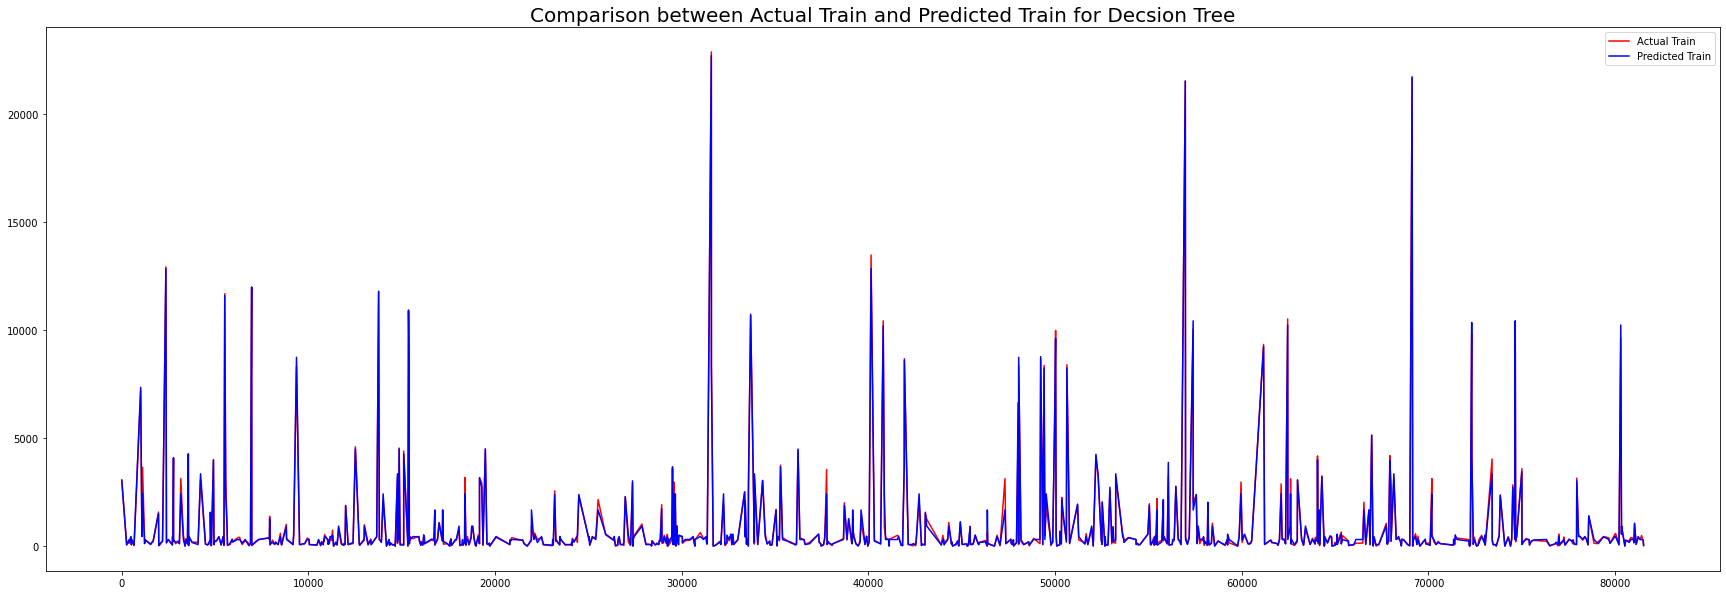

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( itemgetter(*indices_tr)(ytr), list(y_train.iloc[indices_tr]), color = 'red', label = 'Actual Train')
sns.lineplot( itemgetter(*indices_tr)(ytr),list(y_pred_train_dt[indices_tr]), color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Decsion Tree",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test for Decision Tree')

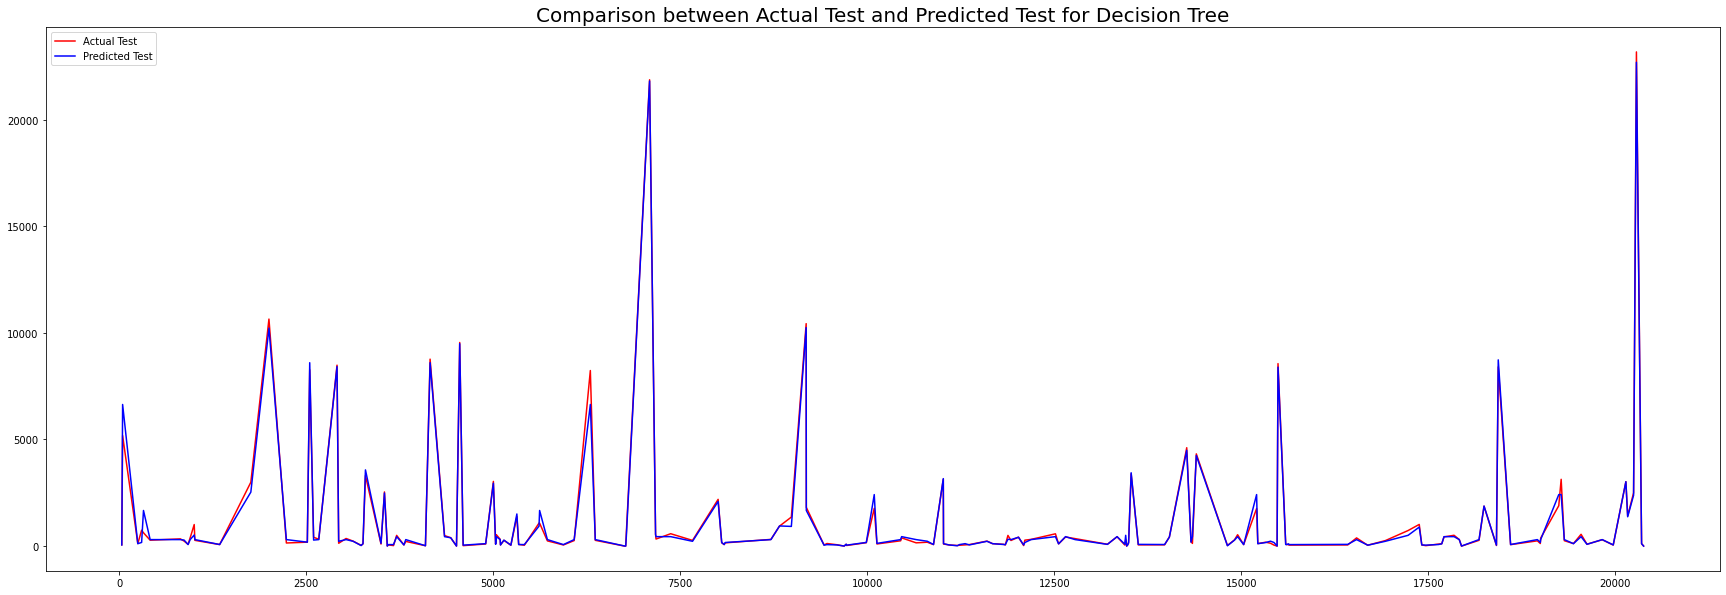

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(itemgetter(*indices_t)(yt), list(y_test.iloc[indices_t]), color = 'red', label = 'Actual Test')
sns.lineplot( itemgetter(*indices_t)(yt),list(y_pred_test_dt[indices_t]), color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test for Decision Tree",fontsize=20)

###**Random Forest**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = { 'bootstrap': [True], 'max_depth': range(2,10), 'max_features': ['auto', 'log2', 'sqrt'], 'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 250]}

In [ ]:
rfr = RandomForestRegressor(random_state = 0)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 5, n_jobs = -1, verbose = 0,scoring='neg_root_mean_squared_error', return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 150}


In [ ]:
best_rf = RandomForestRegressor(n_estimators = 150, max_depth = 9 ,max_features ='auto' ,bootstrap = True, random_state = 0)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=150, random_state=0)

In [ ]:
print(best_rf.score(X_test, y_test))

0.9940369982218061


In [ ]:
rf_y_pred_train = best_rf.predict(X_train)
rf_train_accuracy = r2_score(y_train, rf_y_pred_train)
rf_y_pred_test = best_rf.predict(X_test)
rf_test_accuracy = r2_score(y_test, rf_y_pred_test)
print("Train R2 score for Random Forest Model", round(rf_train_accuracy,4))
print("Test R2 score for Random Forest Model", round(rf_test_accuracy,4))

Train R2 score for Random Forest Model 0.9947
Test R2 score for Random Forest Model 0.994


In [ ]:
rf_y_pred_train = best_rf.predict(X_train)
rf_train_accuracy = mean_absolute_percentage_error(y_train, rf_y_pred_train)
rf_y_pred_test = best_rf.predict(X_test)
rf_test_accuracy = mean_absolute_percentage_error(y_test, rf_y_pred_test)
print("Train Mean Absolute Percentage Error for Random Forest Model", round(rf_train_accuracy,4))
print("Test Mean Absolute Percentage Error for Random Forest Model", round(rf_test_accuracy,4))

Train Mean Absolute Percentage Error for Random Forest Model 1.4142
Test Mean Absolute Percentage Error for Random Forest Model 1.4609


In [ ]:
rf_y_pred_train = best_rf.predict(X_train)
rf_train_accuracy = mean_squared_error(y_train, rf_y_pred_train, squared = False)
rf_y_pred_test = best_rf.predict(X_test)
rf_test_accuracy = mean_squared_error(y_test, rf_y_pred_test, squared = False)
print("Train Root Mean Squared Error for Random Forest Model", round(rf_train_accuracy,4))
print("Train Root Mean Squared Error for Random Forest Model", round(rf_test_accuracy,4))

Train Root Mean Squared Error for Random Forest Model 178.1731
Train Root Mean Squared Error for Random Forest Model 187.9997


In [ ]:
table.add_row(["Random Forest",0.9947,0.994, 178.1731, 187.9997, 1.4142,1.4609])

In [ ]:
print(table)

+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|            Model Name           | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|        Linear Regression        |     0.3866     |     0.3772    |              1912.3278              |             1921.1769              |                  337.6874                  |                 332.38302                 |
| Polynomial Regression(degree=3) |     0.8844     |     0.8576    |

Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Random Forest')

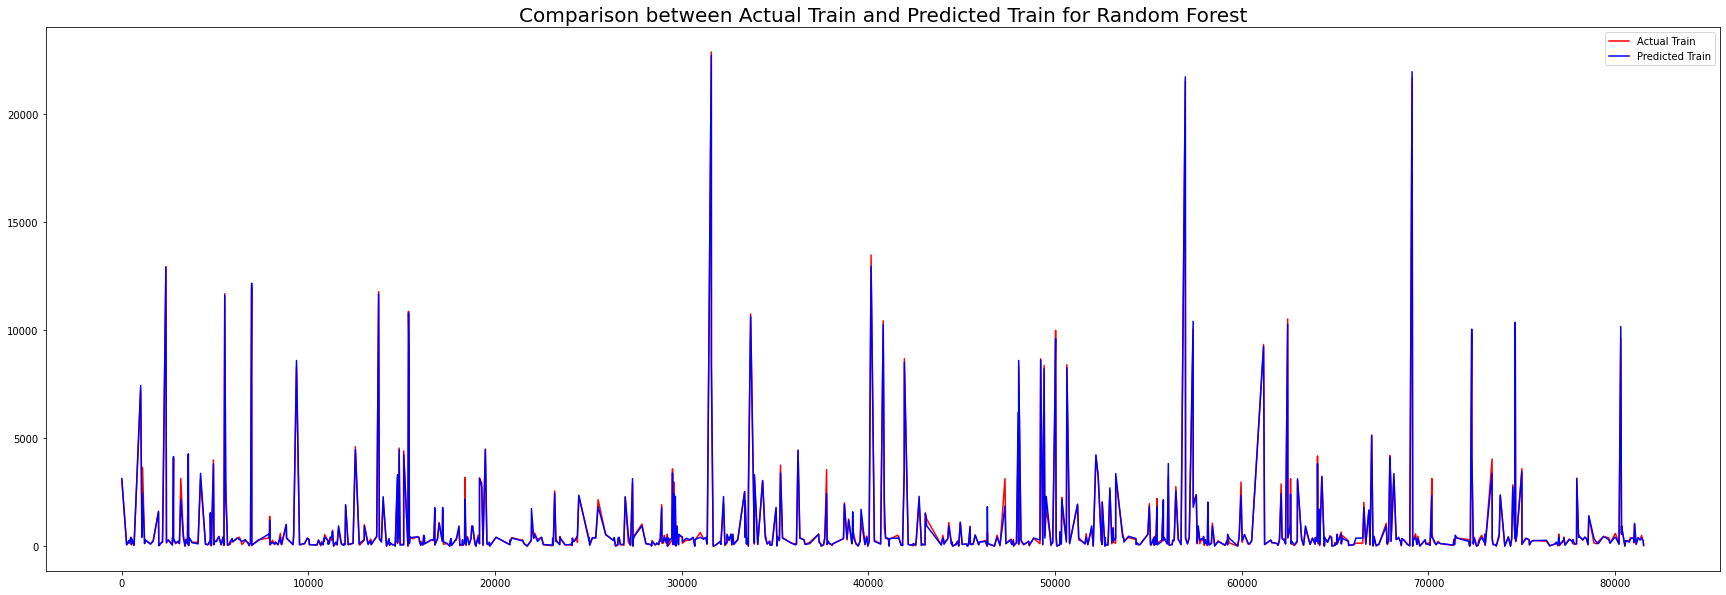

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( itemgetter(*indices_tr)(ytr), list(y_train.iloc[indices_tr]), color = 'red', label = 'Actual Train')
sns.lineplot( itemgetter(*indices_tr)(ytr),list(rf_y_pred_train[indices_tr]), color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Random Forest",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test for Random Forest')

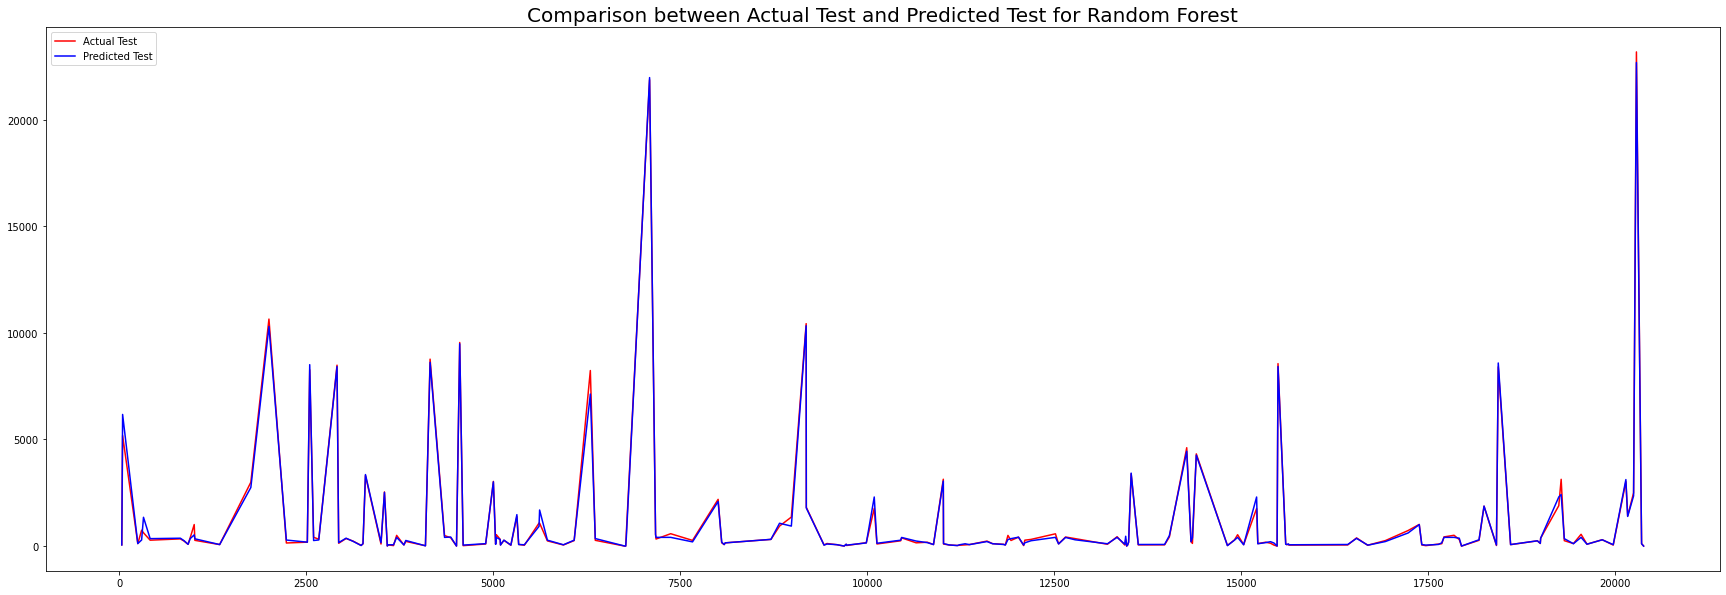

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(itemgetter(*indices_t)(yt), list(y_test.iloc[indices_t]), color = 'red', label = 'Actual Test')
sns.lineplot( itemgetter(*indices_t)(yt),list(rf_y_pred_test[indices_t]), color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test for Random Forest",fontsize=20)

In [ ]:
rf_result = permutation_importance(best_rf,X_train,y_train, random_state = 0)
cols = X_train.columns
mean = rf_result.importances_mean
std = rf_result.importances_std
df_rf_res = pd.DataFrame({'features':cols, 'importance':mean, 'importance_std': std}).sort_values('importance', ascending=False)

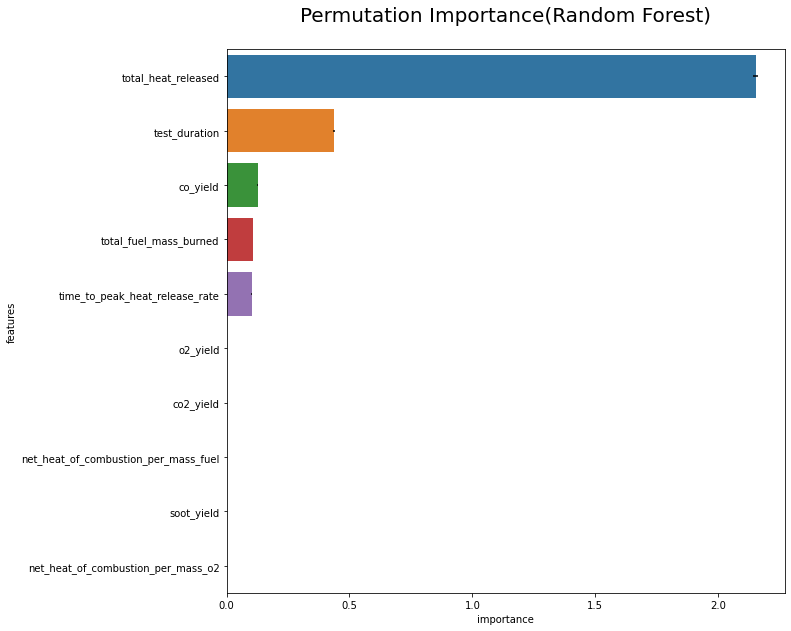

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='importance',y='features', data = df_rf_res, orient='h', xerr = df_rf_res["importance_std"] )
plt.title("Permutation Importance(Random Forest)\n", fontsize=20);

###**Boosting(Gradient Boosting)**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_grid = {'max_depth': range(2,10,2),  'learning_rate' : [0.001, 0.01, 0.1, 0.5],
              'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200]
              }

In [ ]:
gbc = GradientBoostingRegressor(random_state = 0)

g_search = RandomizedSearchCV(estimator = gbc, param_distributions = param_grid, n_iter = 15,

                          cv = 5, n_jobs = -1, verbose = 0, scoring='neg_root_mean_squared_error', return_train_score=True)

In [ ]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.5}


In [ ]:
best_gbc = GradientBoostingRegressor(n_estimators = 200, max_depth = 8 , learning_rate = 0.5  , random_state = 0)
best_gbc.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.5, max_depth=8, n_estimators=200,
                          random_state=0)

In [ ]:
print(best_gbc.score(X_test, y_test))

0.9983810711394251


In [ ]:
gbc_y_pred_train = best_gbc.predict(X_train)
gbc_train_accuracy = r2_score(y_train, gbc_y_pred_train)
gbc_y_pred_test = best_gbc.predict(X_test)
gbc_test_accuracy = r2_score(y_test, gbc_y_pred_test)
print("Train R2 score for Gradient Boost Model", round(gbc_train_accuracy,4))
print("Test R2 score for Gradient Boost Model", round(gbc_test_accuracy,4))

Train R2 score for Gradient Boost Model 0.9999
Test R2 score for Gradient Boost Model 0.9984


In [ ]:
gbc_y_pred_train = best_gbc.predict(X_train)
gbc_train_accuracy = mean_absolute_percentage_error(y_train, gbc_y_pred_train)
gbc_y_pred_test = best_gbc.predict(X_test)
gbc_test_accuracy = mean_absolute_percentage_error(y_test, gbc_y_pred_test)
print("Train Mean Absolute Percentage Error for Gradient Boost Model", round(gbc_train_accuracy,4))
print("Test Mean Absolute Percentage Error for Gradient Boost Model", round(gbc_test_accuracy,4))

Train Mean Absolute Percentage Error for Gradient Boost Model 1.5328
Test Mean Absolute Percentage Error for Gradient Boost Model 2.6472


In [ ]:
gbc_y_pred_train = best_gbc.predict(X_train)
gbc_train_accuracy = mean_squared_error(y_train, gbc_y_pred_train, squared = False)
gbc_y_pred_test = best_gbc.predict(X_test)
gbc_test_accuracy = mean_squared_error(y_test, gbc_y_pred_test, squared =  False)
print("Train Root Mean Squared Error for Gradient Boost Model", round(gbc_train_accuracy,4))
print("Test Root Mean Squared Error for Gradient Boost Model", round(gbc_test_accuracy,4))

Train Root Mean Squared Error for Gradient Boost Model 17.6529
Test Root Mean Squared Error for Gradient Boost Model 97.9577


In [ ]:
table.add_row(["Gradient Boosting",0.9999, 0.9984,  17.6529, 97.9577, 1.5328, 2.6472])

In [ ]:
print(table)

+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|            Model Name           | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|        Linear Regression        |     0.3866     |     0.3772    |              1912.3278              |             1921.1769              |                  337.6874                  |                 332.38302                 |
| Polynomial Regression(degree=3) |     0.8844     |     0.8576    |

Text(0.5, 1.0, 'Comparison between Actual Train and Predicted Train for Gradient Boosting')

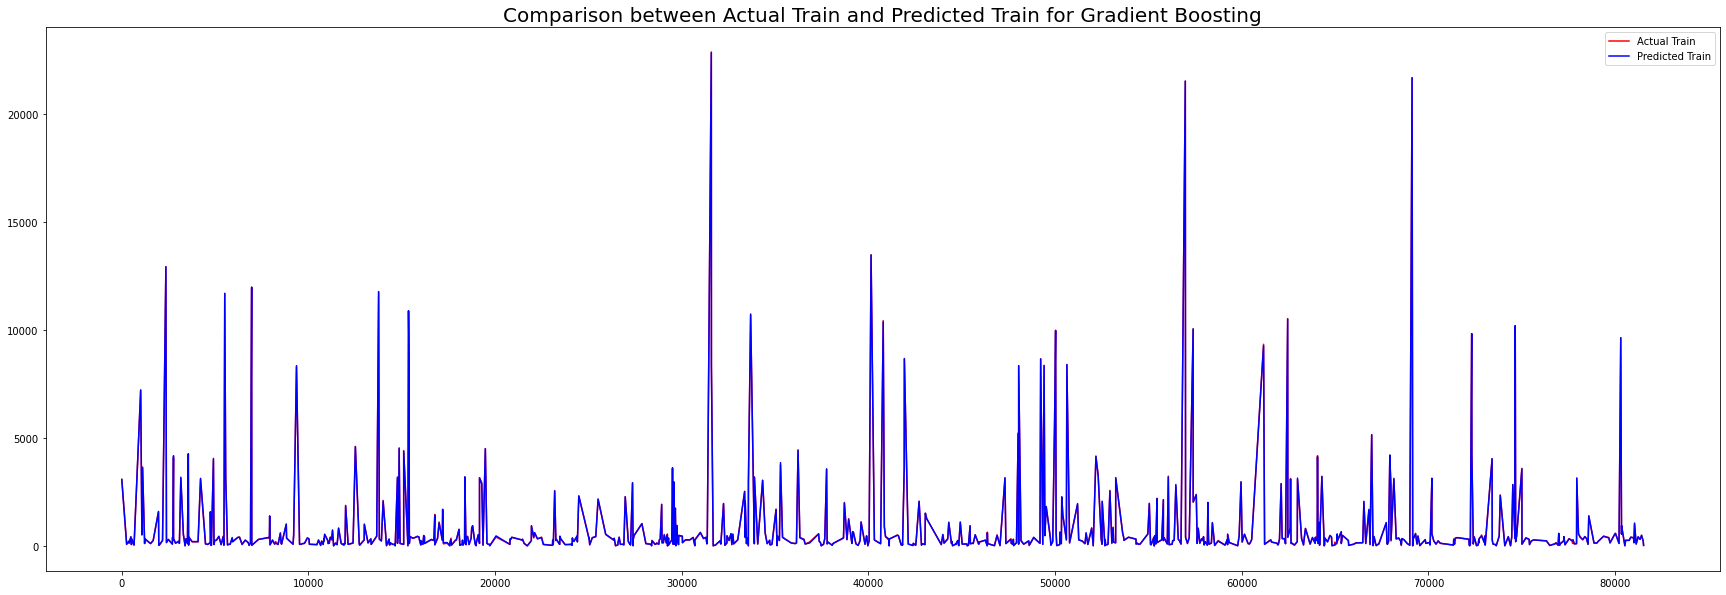

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot( itemgetter(*indices_tr)(ytr), list(y_train.iloc[indices_tr]), color = 'red', label = 'Actual Train')
sns.lineplot( itemgetter(*indices_tr)(ytr),list(gbc_y_pred_train[indices_tr]), color = 'blue', label = 'Predicted Train')
plt.title("Comparison between Actual Train and Predicted Train for Gradient Boosting",fontsize=20)

Text(0.5, 1.0, 'Comparison between Actual Test and Predicted Test for Gradient Boosting')

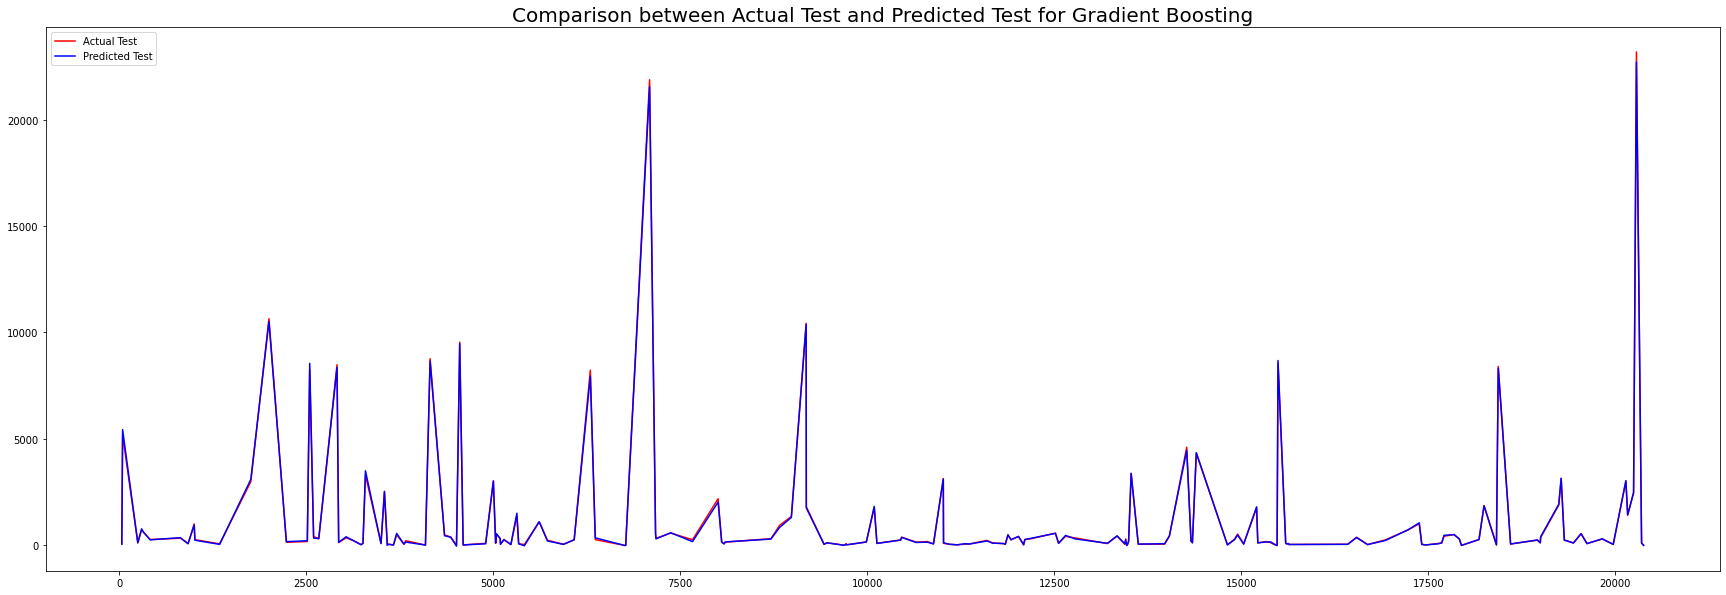

In [ ]:
plt.figure(figsize=(30,10))
sns.lineplot(itemgetter(*indices_t)(yt), list(y_test.iloc[indices_t]), color = 'red', label = 'Actual Test')
sns.lineplot( itemgetter(*indices_t)(yt),list(gbc_y_pred_test[indices_t]), color = 'blue', label = 'Predicted Test')
plt.title("Comparison between Actual Test and Predicted Test for Gradient Boosting",fontsize=20)

In [ ]:
gbc_result = permutation_importance(best_gbc,X_train,y_train, random_state = 0)
cols = X_train.columns
mean = gbc_result.importances_mean
std = gbc_result.importances_std
df_gbc_res = pd.DataFrame({'features':cols, 'importance':mean, 'importance_std': std}).sort_values('importance', ascending=False)

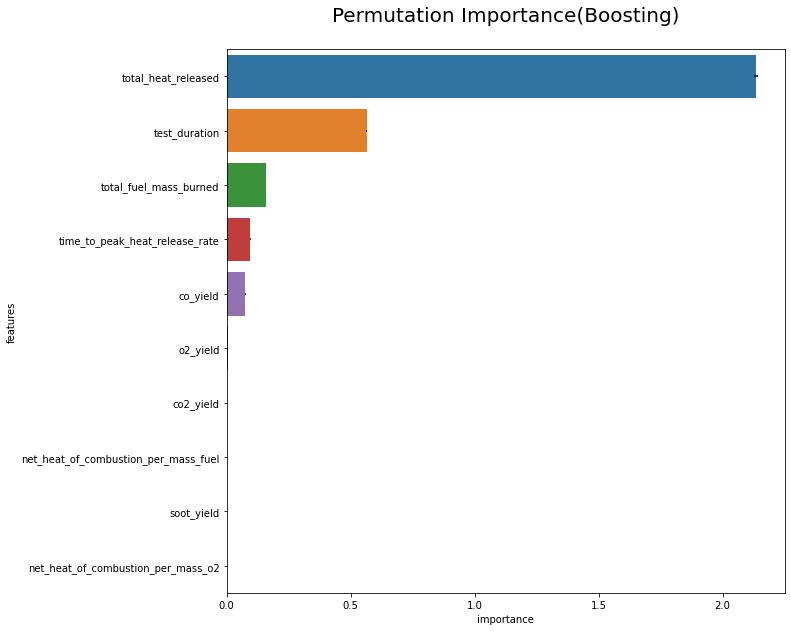

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='importance',y='features', data = df_gbc_res, orient='h', xerr = df_gbc_res["importance_std"] )
plt.title("Permutation Importance(Boosting)\n", fontsize=20);

##**Comparing all models**

In [ ]:
def r2_s(X,y,model):
  return r2_score(y, model.predict(X))

In [ ]:
print(table)

+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|            Model Name           | R2 Score_train | R2 Score_test | Root Mean Squared Error(RMSE)_train | Root Mean Squared Error(RMSE)_test | Mean Absolute Percentage Error(MAPE)_train | Mean Absolute Percentage Error(MAPE)_test |
+---------------------------------+----------------+---------------+-------------------------------------+------------------------------------+--------------------------------------------+-------------------------------------------+
|        Linear Regression        |     0.3866     |     0.3772    |              1912.3278              |             1921.1769              |                  337.6874                  |                 332.38302                 |
| Polynomial Regression(degree=3) |     0.8844     |     0.8576    |

[0.38662672250032015, 0.884431400538206, 0.9934731879888777, 0.994675430583763, 0.9999477327019805]
[0.3772907980952672, 0.8576483742810599, 0.9924047319469886, 0.9940369982218061, 0.9983810711394251]


Text(0.5, 1.0, 'Comparison of Train and Test Accuracy Performance of All Models')

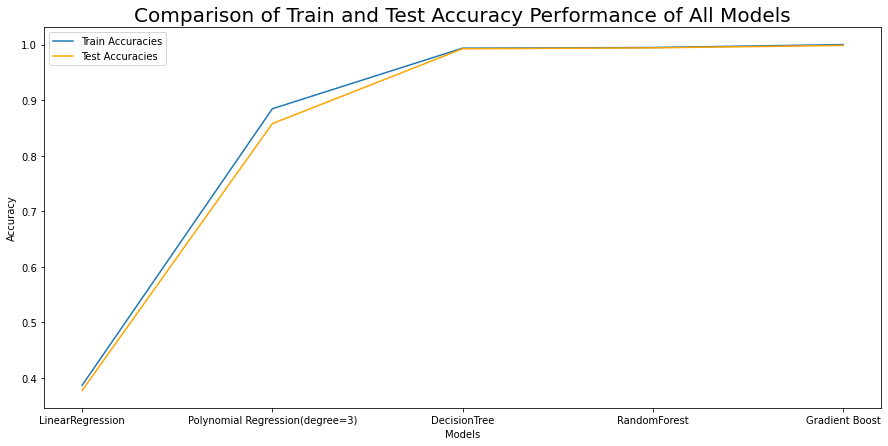

In [ ]:
model_names = ['LinearRegression','Polynomial Regression(degree=3)', 'DecisionTree', 'RandomForest', 'Gradient Boost']
model_objects = [lr,poly_reg, dtree, best_rf, best_gbc]
train_acc = [r2_s(X_train_std, y_train, lr), r2_s(xtrain_poly, y_train, poly_reg), r2_s(X_train, y_train, dtree), r2_s(X_train, y_train, best_rf), r2_s(X_train, y_train, best_gbc)]
test_acc = [r2_s(X_test_std, y_test, lr),r2_s(xtest_poly, y_test, poly_reg), r2_s(X_test, y_test, dtree), r2_s(X_test, y_test, best_rf), r2_s(X_test, y_test, best_gbc)]
print(train_acc)
print(test_acc)
plt.figure(figsize=(15, 7))
plt.plot(model_names, train_acc, label='Train Accuracies')
plt.plot(model_names, test_acc, color='orange', label='Test Accuracies')
plt.legend()
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Comparison of Train and Test Accuracy Performance of All Models", fontdict={'fontsize': 20})

#**Conclusion**



*   Development data used for modeling suffers from small sample bias consisting of around 1000 observations to start with.
*   Each sample point contains values of features summarizing an experiment. Hence, for any given experiment, each feature quantity has measurement uncertainity associated with it. 
* Assuming features to be normally distributed, the interval(feature value + 2 *
uncertainty , feature value - 2 * uncertainty) is considered to have 95% coverage probability for the feature. This is used to sample feature values for all the experiments for the purpose of data augmentation.
*   The assumption of Guassian approximation is supported using Central Limit Theorem.
* Finally, the correlation of the augmented data matrix is computed to ensure that the correlation observed within original data is preserved.
* Modeling exercise is performed on both original and augmented data and resulting performance is compared. 
*   **Regression**

> * Dependent variable for the prediction exercise is Peak Heat Release Rate. A total of 9 features are used to start with as Explatory variables.
* However, upon performing EDA, features exhibit weak linear correlation with the response variable. Also, the response variable has a skewed distribution and hence, suffers from extreme values or outliers
* Model performance was measured using metrics: R squared, Root Mean Squared Error and Mean Absolute Percentage Error. MAPE was considered to get better picture as the response variable is observed to extreme values.
* Following models were explored for the purpose of predcition:
>> *  **Linear Regression**
>>> * Standardizing of feature variables is performed before proceeding with linear regression. Linear regression performs poorly, having R2 score less than 50%. This is in line with the observation that feature variables have very low correlation with response variable. This being true for both original and augmented data.
>>*   **Random Forests and Decision Trees**
>>> * These performed well on original data with their accuracy around being close to 90%. However, upon further investigation of other metrics like RMSE and MAPE, these values were observed to be high.
>>>*This was basically due to the reason that the model wasn't able to do well in predicting the tail of the distribution.
>>>* This is where augmented data came as a freat help in creating a more robust model abd fitting the tail or extreme values well.
>>>* The performance of these models improved from 90% to 99% in terms of R2 squared. Likewise, other metrics also reduced to one tenth of RMSE and MAPE statistics observed earlier
>>*  **Gradient Boosting**
>>>* In case of original data, gradient boosting trees were observed to suffer from overfitting even after tuning its hyperparamters. However, the model performance on augmented data improved drastically and was similar to the performance of Random Forest and Decision tree.
>>* **Variable Importance**
>>>* Finally variable importance was computed and *total_heat_released*, *test_duration*, *total_fuel_mass_burned*, *co_yield*, *time_to _peak_heat_release_rate* were found to be most important features explaining the Peak_heat_release_rate. 
>>>* These variables were also found to be the ones having moderate linear correlation  with the response variable.















